<a href="https://colab.research.google.com/github/vandavilli/My-AIML-Portfolio/blob/main/Berkeley_tests_Nov_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
vices = pd.read_excel("https://github.com/SavioSal/datasets/raw/master/Smoking%20Drinking.xlsx")

In [ ]:
vices.head()

,Person,Smoking,Drinking
0,1,NS,OD
1,2,NS,HD
2,3,OS,HD
3,4,HS,ND
4,5,NS,OD


In [ ]:
vices.Smoking.unique()

array(['NS', 'OS', 'HS'], dtype=object)

In [ ]:
vices.Drinking.unique()

array(['OD', 'HD', 'ND'], dtype=object)

In [ ]:
help(pd.crosstab)

Help on function crosstab in module pandas.core.reshape.pivot:

crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: 'str' = 'All', dropna: 'bool' = True, normalize=False) -> 'DataFrame'
    Compute a simple cross tabulation of two (or more) factors. By default
    computes a frequency table of the factors unless an array of values and an
    aggregation function are passed.
    
    Parameters
    ----------
    index : array-like, Series, or list of arrays/Series
        Values to group by in the rows.
    columns : array-like, Series, or list of arrays/Series
        Values to group by in the columns.
    values : array-like, optional
        Array of values to aggregate according to the factors.
        Requires `aggfunc` be specified.
    rownames : sequence, default None
        If passed, must match number of row arrays passed.
    colnames : sequence, default None
        If passed, must match number of column arrays pas

In [ ]:
pd.crosstab(vices.Smoking, vices.Drinking)

Drinking,HD,ND,OD
Smoking,,,
HS,733,163,552
NS,733,2118,2061
OS,899,435,1067


In [ ]:
pd.crosstab(vices.Smoking, vices.Drinking, normalize = True)

Drinking,HD,ND,OD
Smoking,,,
HS,0.083666,0.018605,0.063007
NS,0.083666,0.241753,0.235247
OS,0.102614,0.049652,0.121790


In [ ]:
softdrinks = pd.read_excel("https://github.com/SavioSal/datasets/raw/master/Soft%20drinks%20research.xlsx")
softdrinks.head()

,Consumer,Gender,Age,Preference
0,1,F,Over 60,Our brand
1,2,F,Between 40 and 60,Our brand
2,3,M,Between 40 and 60,Our brand
3,4,F,Over 60,Competing brand
4,5,M,Between 20 and 40,Our brand


In [ ]:
pd.crosstab(softdrinks.Gender, softdrinks.Preference)

Preference,Competing brand,Our brand
Gender,,
F,90,94
M,26,40


In [ ]:
pd.crosstab(softdrinks.Gender, softdrinks.Preference, normalize = True)

Preference,Competing brand,Our brand
Gender,,
F,0.360,0.376
M,0.104,0.160


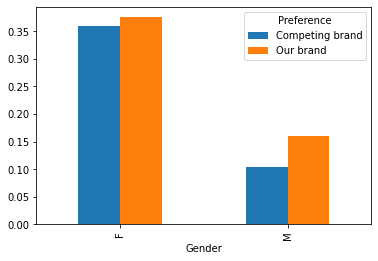

In [ ]:
pd.crosstab(softdrinks.Gender, softdrinks.Preference, normalize = True).plot(kind = 'bar')

In [ ]:
import seaborn as sns

In [ ]:
help(sns.load_dataset)

Help on function load_dataset in module seaborn.utils:

load_dataset(name, cache=True, data_home=None, **kws)
    Load an example dataset from the online repository (requires internet).
    
    This function provides quick access to a small number of example datasets
    that are useful for documenting seaborn or generating reproducible examples
    for bug reports. It is not necessary for normal usage.
    
    Note that some of the datasets have a small amount of preprocessing applied
    to define a proper ordering for categorical variables.
    
    Use :func:`get_dataset_names` to see a list of available datasets.
    
    Parameters
    ----------
    name : str
        Name of the dataset (``{name}.csv`` on
        https://github.com/mwaskom/seaborn-data).
    cache : boolean, optional
        If True, try to load from the local cache first, and save to the cache
        if a download is required.
    data_home : string, optional
        The directory in which to cache data; se

In [ ]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
pd.crosstab(tips.sex, tips.day, normalize = True)

day,Thur,Fri,Sat,Sun
sex,,,,
Male,0.122951,0.040984,0.241803,0.237705
Female,0.131148,0.036885,0.114754,0.073770


In [ ]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


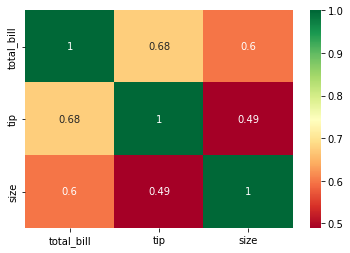

In [ ]:
sns.heatmap(tips.corr(), annot = True, cmap = "RdYlGn")

In [ ]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 

In [ ]:
# original dataset: https://www.govtrack.us/congress/votes/88-1964/h182#details
cra = pd.read_csv("https://github.com/SavioSal/datasets/raw/master/congress_votes_88-1964_h182.csv")
cra.head()

,person,state,district,vote,name,party
0,400110,MI,15,Yea,"Rep. John D. Dingell [D, 1955-1964]",Democrat
1,400572,CA,29,Yea,"Rep. George E. Brown [D, 1963-1970]",Democrat
2,400665,VA,4,Nay,"Rep. Watkins Abbitt [D, 1947-1972]",Democrat
3,400674,OH,10,Yea,"Rep. Homer Abele [R, 1963-1964]",Republican
4,400678,MS,1,Nay,"Rep. Thomas Abernethy [D, 1953-1972]",Democrat


In [ ]:
cra.groupby("party").count()

,person,state,district,vote,name
party,,,,,
Democrat,253,253,253,253,253
Republican,178,178,178,178,178


In [ ]:
pd.crosstab(cra.vote, cra.party)

party,Democrat,Republican
vote,,
Nay,91,35
Not Voting,7,5
Present,2,2
Yea,153,136


In [ ]:
# simpson's paradox: https://online.stat.psu.edu/stat100/lesson/6/6.3


#OH3 - December 16, 2022

In [ ]:
import pandas as pd

In [ ]:
store = pd.read_excel("https://github.com/SavioSal/datasets/raw/master/SupermarketTransactions.xlsx")

In [ ]:
store.head(1)

,Transaction,Purchase Date,Customer ID,Gender,Marital Status,Homeowner,Children,Annual Income,City,State or Province,Country,Product Family,Product Department,Product Category,Units Sold,Revenue
0,1,2011-12-18,7223,F,S,Y,2,$30K - $50K,Los Angeles,CA,USA,Food,Snack Foods,Snack Foods,5,27.38


In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14059 entries, 0 to 14058
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction         14059 non-null  int64         
 1   Purchase Date       14059 non-null  datetime64[ns]
 2   Customer ID         14059 non-null  int64         
 3   Gender              14059 non-null  object        
 4   Marital Status      14059 non-null  object        
 5   Homeowner           14059 non-null  object        
 6   Children            14059 non-null  int64         
 7   Annual Income       14059 non-null  object        
 8   City                14059 non-null  object        
 9   State or Province   14059 non-null  object        
 10  Country             14059 non-null  object        
 11  Product Family      14059 non-null  object        
 12  Product Department  14059 non-null  object        
 13  Product Category    14059 non-null  object    

In [ ]:
store.sum()

<ipython-input-5-46281f50cd65>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  store.sum()


Transaction                                                    98834770
Customer ID                                                    71938527
Gender                FMFMFFMFMMFMMFMMFFFFMFMFFMFMMMFMMFFMFMFMMFMFFF...
Marital Status        SMMMSMSMMSMMSMSMSSMSMSSMMMMSSMSMMSMMMMSMSSSMMS...
Homeowner             YYNYYYYYYNNYNNNYNNYNYYNYYNNNNYYYYNNNYYNNNNNYYY...
Children                                                          35574
Annual Income         $30K - $50K$70K - $90K$50K - $70K$30K - $50K$1...
City                  Los AngelesLos AngelesBremertonPortlandBeverly...
State or Province     CACAWAORCACAORWAWACACACAWAWAORORWACAWACACACAOR...
Country               USAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAU...
Product Family        FoodFoodFoodFoodDrinkFoodFoodFoodNon-Consumabl...
Product Department    Snack FoodsProduceSnack FoodsSnacksBeveragesDe...
Product Category      Snack FoodsVegetablesSnack FoodsCandyCarbonate...
Units Sold                                                      

In [ ]:
store = store.convert_dtypes()
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14059 entries, 0 to 14058
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction         14059 non-null  Int64         
 1   Purchase Date       14059 non-null  datetime64[ns]
 2   Customer ID         14059 non-null  Int64         
 3   Gender              14059 non-null  string        
 4   Marital Status      14059 non-null  string        
 5   Homeowner           14059 non-null  string        
 6   Children            14059 non-null  Int64         
 7   Annual Income       14059 non-null  string        
 8   City                14059 non-null  string        
 9   State or Province   14059 non-null  string        
 10  Country             14059 non-null  string        
 11  Product Family      14059 non-null  string        
 12  Product Department  14059 non-null  string        
 13  Product Category    14059 non-null  string    

In [ ]:
store.sum()

<ipython-input-8-46281f50cd65>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  store.sum()


Transaction    98834770.00
Customer ID    71938527.00
Children          35574.00
Units Sold        57369.00
Revenue          182830.43
dtype: float64

In [ ]:
import numpy as np

store.aggregate(np.sum)

/usr/local/lib/python3.8/dist-packages/pandas/core/apply.py:169: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return getattr(obj, f)()


Transaction    98834770.00
Customer ID    71938527.00
Children          35574.00
Units Sold        57369.00
Revenue          182830.43
dtype: float64

In [ ]:
store['Revenue'].aggregate(np.sum)

182830.43

In [ ]:
store['Revenue'].sum()

182830.43

In [ ]:
store['Revenue'].aggregate([np.sum, np.mean])

sum     182830.430000
mean        13.004512
Name: Revenue, dtype: float64

In [ ]:
store['Revenue'].aggregate(["sum", "mean"])

sum     182830.430000
mean        13.004512
Name: Revenue, dtype: float64

In [ ]:
store[['Revenue', 'Units Sold']].aggregate(["sum", "mean"])

,Revenue,Units Sold
sum,182830.430000,57369.000000
mean,13.004512,4.080589


In [ ]:
store.aggregate({'Revenue':"sum", 'Units Sold':"mean"})

Revenue       182830.430000
Units Sold         4.080589
dtype: float64

In [ ]:
# groupby
store.columns

Index(['Transaction', 'Purchase Date', 'Customer ID', 'Gender',
       'Marital Status', 'Homeowner', 'Children', 'Annual Income', 'City',
       'State or Province', 'Country', 'Product Family', 'Product Department',
       'Product Category', 'Units Sold', 'Revenue'],
      dtype='object')

In [ ]:
store['Product Family'].value_counts()

Food              10153
Non-Consumable     2656
Drink              1250
Name: Product Family, dtype: Int64

In [ ]:
store.groupby('Product Family').groups

{'Drink': [4, 18, 19, 24, 39, 111, 136, 175, 180, 213, 221, 228, 240, 249, 251, 252, 257, 261, 280, 283, 298, 300, 306, 310, 321, 344, 362, 383, 405, 419, 424, 471, 473, 475, 493, 497, 505, 515, 517, 549, 556, 559, 583, 584, 585, 590, 594, 599, 608, 617, 635, 642, 643, 648, 658, 660, 693, 727, 737, 739, 753, 770, 774, 789, 825, 834, 867, 868, 872, 880, 884, 908, 913, 923, 930, 942, 943, 947, 969, 996, 1003, 1008, 1017, 1032, 1036, 1044, 1064, 1068, 1096, 1115, 1138, 1143, 1147, 1153, 1155, 1160, 1163, 1170, 1174, 1183, ...], 'Food': [0, 1, 2, 3, 5, 6, 7, 10, 11, 12, 14, 16, 17, 21, 22, 23, 25, 26, 28, 29, 32, 33, 35, 36, 40, 42, 43, 44, 47, 48, 50, 51, 52, 53, 54, 57, 58, 59, 60, 61, 62, 63, 64, 66, 68, 69, 70, 72, 73, 74, 76, 79, 80, 81, 83, 85, 86, 87, 88, 89, 91, 92, 93, 94, 95, 96, 98, 102, 103, 104, 105, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 138, 139, 141, ...], 'Non-Consumable': [8, 9, 13,

In [ ]:
store.groupby(['Gender', 'Product Family']).groups

{('F', 'Drink'): [4, 18, 19, 24, 136, 175, 180, 213, 228, 240, 249, 251, 252, 261, 298, 300, 310, 362, 419, 424, 475, 493, 497, 505, 515, 549, 584, 594, 635, 658, 693, 727, 770, 834, 868, 913, 923, 930, 942, 943, 969, 1032, 1044, 1064, 1138, 1147, 1155, 1163, 1196, 1200, 1205, 1242, 1243, 1245, 1251, 1261, 1277, 1287, 1295, 1297, 1299, 1324, 1329, 1346, 1376, 1397, 1457, 1485, 1511, 1513, 1517, 1553, 1559, 1561, 1622, 1635, 1645, 1703, 1713, 1773, 1819, 1859, 1874, 1881, 1914, 1925, 1929, 1930, 1937, 1938, 1984, 2004, 2039, 2043, 2053, 2079, 2113, 2151, 2175, 2212, ...], ('F', 'Food'): [0, 2, 5, 7, 10, 16, 17, 21, 23, 26, 33, 36, 43, 44, 47, 48, 50, 52, 53, 57, 59, 60, 63, 66, 68, 69, 70, 72, 76, 79, 81, 83, 86, 87, 88, 89, 91, 93, 94, 96, 103, 105, 108, 109, 110, 115, 116, 119, 121, 123, 125, 126, 127, 128, 129, 130, 132, 135, 138, 139, 141, 142, 145, 147, 149, 150, 154, 156, 158, 160, 165, 166, 169, 170, 171, 172, 176, 177, 178, 181, 182, 186, 187, 188, 191, 192, 196, 197, 200, 203, 

In [ ]:
store_groups = store.groupby(['Gender', 'Product Family'])
for group, data in store_groups:
  display(data)

,Transaction,Purchase Date,Customer ID,Gender,Marital Status,Homeowner,Children,Annual Income,City,State or Province,Country,Product Family,Product Department,Product Category,Units Sold,Revenue
4,5,2011-12-22,1900,F,S,Y,3,$130K - $150K,Beverly Hills,CA,USA,Drink,Beverages,Carbonated Beverages,4,14.0
18,19,2011-12-28,354,F,M,Y,2,$150K +,Yakima,WA,USA,Drink,Dairy,Dairy,5,7.75
19,20,2011-12-28,3458,F,S,N,5,$10K - $30K,San Diego,CA,USA,Drink,Beverages,Drinks,5,6.66
24,25,2011-12-29,3386,F,M,Y,4,$30K - $50K,San Diego,CA,USA,Drink,Alcoholic Beverages,Beer and Wine,4,14.78
136,137,2012-01-17,8091,F,S,Y,4,$90K - $110K,Salem,OR,USA,Drink,Alcoholic Beverages,Beer and Wine,4,8.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13934,13935,2013-12-13,3989,F,M,Y,4,$10K - $30K,Seattle,WA,USA,Drink,Alcoholic Beverages,Beer and Wine,5,2.74
13942,13943,2013-12-13,7896,F,M,Y,2,$130K - $150K,Yakima,WA,USA,Drink,Dairy,Dairy,3,31.14
13977,13978,2013-12-18,7101,F,M,Y,1,$50K - $70K,Seattle,WA,USA,Drink,Beverages,Carbonated Beverages,6,9.58
14012,14013,2013-12-22,6307,F,M,Y,4,$10K - $30K,Spokane,WA,USA,Drink,Beverages,Drinks,5,14.9


,Transaction,Purchase Date,Customer ID,Gender,Marital Status,Homeowner,Children,Annual Income,City,State or Province,Country,Product Family,Product Department,Product Category,Units Sold,Revenue
0,1,2011-12-18,7223,F,S,Y,2,$30K - $50K,Los Angeles,CA,USA,Food,Snack Foods,Snack Foods,5,27.38
2,3,2011-12-21,8374,F,M,N,2,$50K - $70K,Bremerton,WA,USA,Food,Snack Foods,Snack Foods,3,5.52
5,6,2011-12-22,6696,F,M,Y,3,$10K - $30K,Beverly Hills,CA,USA,Food,Deli,Side Dishes,3,4.37
7,8,2011-12-25,354,F,M,Y,2,$150K +,Yakima,WA,USA,Food,Canned Foods,Canned Soup,6,7.34
10,11,2011-12-26,9357,F,M,N,0,$30K - $50K,Beverly Hills,CA,USA,Food,Snack Foods,Snack Foods,3,11.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14045,14046,2013-12-27,4868,F,M,Y,3,$130K - $150K,Spokane,WA,USA,Food,Canned Foods,Canned Soup,3,19.88
14048,14049,2013-12-27,5071,F,M,Y,1,$30K - $50K,Orizaba,Veracruz,Mexico,Food,Canned Foods,Canned Soup,3,3.7
14052,14053,2013-12-28,7234,F,M,Y,4,$30K - $50K,Spokane,WA,USA,Food,Deli,Side Dishes,5,6.8
14054,14055,2013-12-29,9102,F,M,Y,2,$10K - $30K,Bremerton,WA,USA,Food,Baking Goods,Baking Goods,3,9.64


,Transaction,Purchase Date,Customer ID,Gender,Marital Status,Homeowner,Children,Annual Income,City,State or Province,Country,Product Family,Product Department,Product Category,Units Sold,Revenue
13,14,2011-12-26,2032,F,M,N,3,$10K - $30K,Yakima,WA,USA,Non-Consumable,Household,Plastic Products,4,19.5
30,31,2011-12-31,2670,F,S,Y,0,$70K - $90K,San Diego,CA,USA,Non-Consumable,Health and Hygiene,Pain Relievers,5,21.62
34,35,2011-12-31,7617,F,M,N,3,$10K - $30K,Portland,OR,USA,Non-Consumable,Household,Electrical,4,10.94
38,39,2012-01-01,4686,F,S,N,2,$50K - $70K,Los Angeles,CA,USA,Non-Consumable,Household,Electrical,5,11.9
41,42,2012-01-02,8746,F,S,N,3,$30K - $50K,Yakima,WA,USA,Non-Consumable,Household,Kitchen Products,6,13.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14014,14015,2013-12-23,3904,F,S,N,2,$10K - $30K,Vancouver,BC,Canada,Non-Consumable,Health and Hygiene,Pain Relievers,3,9.28
14015,14016,2013-12-23,7051,F,M,N,4,$30K - $50K,Spokane,WA,USA,Non-Consumable,Health and Hygiene,Hygiene,4,3.9
14030,14031,2013-12-25,7663,F,S,Y,4,$90K - $110K,Mexico City,DF,Mexico,Non-Consumable,Health and Hygiene,Decongestants,4,13.44
14031,14032,2013-12-25,2791,F,M,Y,5,$70K - $90K,Portland,OR,USA,Non-Consumable,Health and Hygiene,Cold Remedies,4,6.43


,Transaction,Purchase Date,Customer ID,Gender,Marital Status,Homeowner,Children,Annual Income,City,State or Province,Country,Product Family,Product Department,Product Category,Units Sold,Revenue
39,40,2012-01-01,6207,M,M,N,1,$30K - $50K,Los Angeles,CA,USA,Drink,Dairy,Dairy,5,13.16
111,112,2012-01-14,8818,M,S,N,2,$30K - $50K,Seattle,WA,USA,Drink,Alcoholic Beverages,Beer and Wine,5,29.64
221,222,2012-01-26,9551,M,M,N,2,$10K - $30K,San Diego,CA,USA,Drink,Beverages,Carbonated Beverages,5,2.31
257,258,2012-01-28,8758,M,M,Y,3,$70K - $90K,Los Angeles,CA,USA,Drink,Beverages,Pure Juice Beverages,6,15.65
280,281,2012-01-30,9694,M,S,Y,1,$130K - $150K,Los Angeles,CA,USA,Drink,Alcoholic Beverages,Beer and Wine,3,10.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13955,13956,2013-12-15,5951,M,M,Y,2,$30K - $50K,Vancouver,BC,Canada,Drink,Dairy,Dairy,3,8.89
13993,13994,2013-12-19,9318,M,M,Y,1,$110K - $130K,Spokane,WA,USA,Drink,Beverages,Drinks,4,7.98
13994,13995,2013-12-20,6093,M,M,Y,3,$10K - $30K,Acapulco,Guerrero,Mexico,Drink,Alcoholic Beverages,Beer and Wine,2,3.78
14021,14022,2013-12-24,5985,M,S,Y,4,$130K - $150K,San Andres,DF,Mexico,Drink,Beverages,Drinks,3,4.62


,Transaction,Purchase Date,Customer ID,Gender,Marital Status,Homeowner,Children,Annual Income,City,State or Province,Country,Product Family,Product Department,Product Category,Units Sold,Revenue
1,2,2011-12-20,7841,M,M,Y,5,$70K - $90K,Los Angeles,CA,USA,Food,Produce,Vegetables,5,14.9
3,4,2011-12-21,9619,M,M,Y,3,$30K - $50K,Portland,OR,USA,Food,Snacks,Candy,4,4.44
6,7,2011-12-23,9673,M,S,Y,2,$30K - $50K,Salem,OR,USA,Food,Frozen Foods,Breakfast Foods,4,13.78
11,12,2011-12-26,3097,M,M,Y,1,$30K - $50K,Beverly Hills,CA,USA,Food,Baking Goods,Baking Goods,5,14.45
12,13,2011-12-26,2741,M,S,N,3,$70K - $90K,Bellingham,WA,USA,Food,Canned Foods,Canned Tuna,4,19.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14046,14047,2013-12-27,6782,M,S,N,5,$70K - $90K,Vancouver,BC,Canada,Food,Canned Foods,Canned Soup,5,5.47
14047,14048,2013-12-27,8338,M,S,Y,2,$10K - $30K,San Andres,DF,Mexico,Food,Starchy Foods,Starchy Foods,2,11.4
14049,14050,2013-12-28,1394,M,M,Y,0,$30K - $50K,San Andres,DF,Mexico,Food,Deli,Meat,4,7.15
14050,14051,2013-12-28,6251,M,S,N,4,$50K - $70K,Vancouver,BC,Canada,Food,Dairy,Dairy,5,19.95


,Transaction,Purchase Date,Customer ID,Gender,Marital Status,Homeowner,Children,Annual Income,City,State or Province,Country,Product Family,Product Department,Product Category,Units Sold,Revenue
8,9,2011-12-25,1293,M,M,Y,3,$10K - $30K,Bellingham,WA,USA,Non-Consumable,Household,Cleaning Supplies,1,2.41
9,10,2011-12-25,7938,M,S,N,1,$50K - $70K,San Diego,CA,USA,Non-Consumable,Health and Hygiene,Pain Relievers,2,8.96
15,16,2011-12-27,5230,M,M,Y,3,$30K - $50K,Salem,OR,USA,Non-Consumable,Health and Hygiene,Hygiene,5,12.42
20,21,2011-12-29,1906,M,M,Y,1,$50K - $70K,Beverly Hills,CA,USA,Non-Consumable,Periodicals,Magazines,4,17.92
27,28,2011-12-30,5801,M,S,N,2,$50K - $70K,San Diego,CA,USA,Non-Consumable,Checkout,Hardware,5,3.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13991,13992,2013-12-19,4527,M,M,Y,0,$10K - $30K,Bremerton,WA,USA,Non-Consumable,Household,Bathroom Products,6,13.1
14002,14003,2013-12-21,3826,M,M,N,2,$50K - $70K,Spokane,WA,USA,Non-Consumable,Health and Hygiene,Pain Relievers,3,15.69
14008,14009,2013-12-22,10016,M,M,N,4,$30K - $50K,Vancouver,BC,Canada,Non-Consumable,Household,Hardware,4,10.49
14028,14029,2013-12-24,159,M,M,Y,4,$30K - $50K,Portland,OR,USA,Non-Consumable,Health and Hygiene,Bathroom Products,6,3.54


In [ ]:
store.groupby('Product Family')['Revenue'].sum()

Product Family
Drink              15873.99
Food              132760.94
Non-Consumable      34195.5
Name: Revenue, dtype: Float64

In [ ]:
# Exercise 1
co2 = pd.read_excel("https://github.com/SavioSal/datasets/raw/master/World_Bank_CO2.xlsx", sheet_name = None)
co2

{'About': Empty DataFrame
 Columns: [Data from http://data.worldbank.org/indicator/EN.ATM.CO2E.PC and http://data.worldbank.org/indicator/EN.ATM.CO2E.KT both last updated 02/05/2016]
 Index: [],
 'CO2 (kt) Pivoted':       Country Name Country Code                     Region  Year  CO2 (kt)
 0            Aruba          ABW  Latin America & Caribbean  1960       NaN
 1            Aruba          ABW  Latin America & Caribbean  1961       NaN
 2            Aruba          ABW  Latin America & Caribbean  1962       NaN
 3            Aruba          ABW  Latin America & Caribbean  1963       NaN
 4            Aruba          ABW  Latin America & Caribbean  1964       NaN
 ...            ...          ...                        ...   ...       ...
 11122     Zimbabwe          ZWE         Sub-Saharan Africa  2007   9732.22
 11123     Zimbabwe          ZWE         Sub-Saharan Africa  2008   7682.37
 11124     Zimbabwe          ZWE         Sub-Saharan Africa  2009   8239.75
 11125     Zimbabwe      

In [ ]:
type(co2)

dict

In [ ]:
co2.keys()

dict_keys(['About', 'CO2 (kt) Pivoted', 'CO2 (kt) RAW DATA', 'CO2 Data Cleaned', 'CO2 (kt) for Split', 'CO2 for World to Union', 'CO2 Per Capita RAW DATA', 'CO2 Per Capita (Pivoted)', 'Metadata - Countries'])

In [ ]:
co2['CO2 (kt) RAW DATA'].head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,2497.227,2592.569,2508.228,2522.896,2456.890,2438.555,NaN,NaN,NaN,NaN
1,Andorra,AND,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,546.383,539.049,539.049,517.047,517.047,491.378,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,414.371,491.378,689.396,707.731,839.743,1008.425,...,1657.484,2280.874,4217.050,6776.616,8470.770,12251.447,NaN,NaN,NaN,NaN
3,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,550.050,454.708,1180.774,1151.438,1224.778,1188.108,...,22266.024,25151.953,27172.470,29361.669,29743.037,29710.034,NaN,NaN,NaN,NaN
4,Albania,ALB,CO2 emissions (kt),EN.ATM.CO2E.KT,2024.184,2280.874,2464.224,2082.856,2016.850,2174.531,...,3865.018,4477.407,4657.090,4488.408,4415.068,4668.091,NaN,NaN,NaN,NaN


In [ ]:
# condense the dataframe to a long format
co2['CO2 (kt) RAW DATA'].melt(id_vars=["Country Name", "Country Code"], 
                                   value_vars=[str(x) for x in range(1960, 2012)], 
                                   var_name="Year", 
                                   value_name='CO2 (kt)')

,Country Name,Country Code,Year,CO2 (kt)
0,Aruba,ABW,1960,NaN
1,Andorra,AND,1960,NaN
2,Afghanistan,AFG,1960,414.371
3,Angola,AGO,1960,550.050
4,Albania,ALB,1960,2024.184
...,...,...,...,...
12891,"Yemen, Rep.",YEM,2011,22295.360
12892,South Africa,ZAF,2011,477241.715
12893,"Congo, Dem. Rep.",COD,2011,3424.978
12894,Zambia,ZMB,2011,3047.277


In [ ]:
# Exercise 2
co2 = pd.read_excel("https://github.com/SavioSal/datasets/raw/master/world_bank_carbon.xlsx")
co2.head()

,Country Code,Country Name,Region,Year,CO2 (kt),CO2 Per Capita (metric tons)
0,ABW,Aruba,Latin America & Caribbean,1960,NaN,NaN
1,ABW,Aruba,Latin America & Caribbean,1961,NaN,NaN
2,ABW,Aruba,Latin America & Caribbean,1962,NaN,NaN
3,ABW,Aruba,Latin America & Caribbean,1963,NaN,NaN
4,ABW,Aruba,Latin America & Caribbean,1964,NaN,NaN


In [ ]:
len(co2)

11127

In [ ]:
# what is the best way to visualize the dataset over time?
# visualize the CO2 KT over time for every region
# visualize the CO2 KT over time for every country

In [ ]:
import plotly.express as px

In [ ]:
px.line(co2, x = 'Year', y = "CO2 (kt)", color = "Country Name")

In [ ]:
px.line(co2, x = 'Year', y = "CO2 (kt)", color = "Region")

In [ ]:
co2.columns

Index(['Country Code', 'Country Name', 'Region', 'Year', 'CO2 (kt)',
       'CO2 Per Capita (metric tons)'],
      dtype='object')

In [ ]:
co2_region = co2.groupby(["Year","Region"]).sum().reset_index()

In [ ]:
co2_region.columns

Index(['Year', 'Region', 'CO2 (kt)', 'CO2 Per Capita (metric tons)'], dtype='object')

In [ ]:
px.line(co2_region, x = 'Year', y = "CO2 (kt)", color = "Region")

In [ ]:
px.line(co2.query("`Country Name` == 'China'"), x = 'Year', y = "CO2 (kt)")

#OH4 - January 06, 2023

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_html("https://en.wikipedia.org/wiki/States_and_union_territories_of_India")

In [ ]:
type(df)

list

In [ ]:
len(df)

11

In [ ]:
df[2]

,States and union territories of India ordered by
0,Area Population GDP (per capita) Abbreviations...
1,vte


In [ ]:
for table in df:
  #display(table)
  if "Officiallanguages" in table:
    india_table = table

india_table

,Union territory,ISO 3166-2:IN,Vehiclecode,Zone,Capital,Largest city,UT established,Population,Area(km2),Officiallanguages,Additional officiallanguages
0,Andaman and Nicobar Islands,IN-AN,AN,Southern,Port Blair,Port Blair,1 November 1956,380581,8249,Hindi,English
1,Chandigarh,IN-CH,CH,Northern,Chandigarh,—,1 November 1966,1055450,114,English,—
2,Dadra and Nagar Haveli and Daman and Diu,IN-DH,DD,Western,Daman,Daman,26 January 2020,586956,603,"Hindi, Gujarati, Marathi, English",—
3,Delhi,IN-DL,DL,Northern,New Delhi,Delhi,1 November 1956,16787941,1490,"Hindi, English","Punjabi, Urdu[58]"
4,Jammu and Kashmir,IN-JK,JK,Northern,Srinagar (Summer)[59][60]Jammu (Winter)[60][61],Srinagar,31 October 2019,12258433,42241,"Kashmiri, Dogri, Urdu, Hindi, English",NaN
5,Ladakh,IN-LA,LA,Northern,Leh (Summer)Kargil (Winter)[62],Leh,31 October 2019,290492,59146,"Hindi, English",NaN
6,Lakshadweep,IN-LD,LD,Southern,Kavaratti,Kavaratti,1 November 1956,64473,32,"Malayalam, English",—
7,Puducherry,IN-PY,PY,Southern,Puducherry,Puducherry,16 August 1962,1247953,492,"Tamil, English","Telugu, Malayalam, French"


In [ ]:
baseball = pd.read_excel("https://github.com/SavioSal/datasets/raw/master/Baseball%20Salaries%202011.xlsx")

In [ ]:
baseball.head()

,Player,Team,Position,Salary
0,A.J. Burnett,New York Yankees,Pitcher,16500000
1,A.J. Ellis,Los Angeles Dodgers,Catcher,421000
2,A.J. Pierzynski,Chicago White Sox,Catcher,2000000
3,Aaron Cook,Colorado Rockies,Pitcher,9875000
4,Aaron Crow,Kansas City Royals,Pitcher,1400000


In [ ]:
# determine typical salaries
import plotly.express as px

In [ ]:
px.bar(baseball, x = 'Position', y = 'Salary')

In [ ]:
baseball.groupby("Position").sum().reset_index()

,Position,Salary
0,Catcher,155441868
1,Designated Hitter,56881455
2,First Baseman,228993946
3,Infielder,22138751
4,Outfielder,610766446
5,Pitcher,1215811443
6,Second Baseman,163795632
7,Shortstop,134078135
8,Third Baseman,198253415


In [ ]:
baseball.groupby("Position").mean().reset_index()

,Position,Salary
0,Catcher,2.252781e+06
1,Designated Hitter,7.110182e+06
2,First Baseman,5.452237e+06
3,Infielder,3.162679e+06
4,Outfielder,4.018200e+06
5,Pitcher,2.943853e+06
6,Second Baseman,2.776197e+06
7,Shortstop,2.852726e+06
8,Third Baseman,4.309857e+06


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
baseball.groupby("Position").mean().reset_index().sort_values("Salary", ascending = False)

,Position,Salary
1,Designated Hitter,7110181.875
2,First Baseman,5452236.810
8,Third Baseman,4309856.848
4,Outfielder,4018200.303
3,Infielder,3162678.714
5,Pitcher,2943853.373
7,Shortstop,2852726.277
6,Second Baseman,2776197.153
0,Catcher,2252780.696


In [ ]:
px.bar(baseball.groupby("Position").mean().reset_index().sort_values("Salary", ascending = False), 
       x = "Position", y = "Salary")

In [ ]:
px.bar(baseball.groupby("Position").median().reset_index().sort_values("Salary", ascending = False), 
       x = "Position", y = "Salary")

In [ ]:
import statistics

In [ ]:
statistics.mode(baseball['Salary'])

414000

In [ ]:
baseball.shape

(843, 4)

In [ ]:
baseball.query("Salary < 500000")

,Player,Team,Position,Salary
1,A.J. Ellis,Los Angeles Dodgers,Catcher,421000
8,Aaron Laffey,Seattle Mariners,Pitcher,431600
17,Adam Moore,Seattle Mariners,Catcher,417500
18,Adam Rosales,Oakland Athletics,Second Baseman,425000
19,Adam Russell,Tampa Bay Rays,Pitcher,420800
...,...,...,...,...
826,Will Venable,San Diego Padres,Outfielder,444400
830,Wilson Ramos,Washington Nationals,Catcher,415000
832,Wilton Lopez,Houston Astros,Pitcher,442000
834,Xavier Paul,Los Angeles Dodgers,Outfielder,419500


In [ ]:
px.histogram(baseball, x = 'Salary')

In [ ]:
px.box(baseball, x = 'Position', y = 'Salary')

In [ ]:
def find_boundaries(df, variable, distance):
  IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

  lower_boundary = df[variable].quantile(0.25) - (IQR*distance)
  upper_boundary = df[variable].quantile(0.75) + (IQR*distance)

  return lower_boundary, upper_boundary

In [ ]:
lo, up = find_boundaries(baseball, 'Salary', 1.5)

In [ ]:
import numpy as np
outliers = np.where(baseball['Salary'] > up, True, 
                    np.where(baseball['Salary'] < lo, True, False))

In [ ]:
baseball.loc[~outliers]

,Player,Team,Position,Salary
1,A.J. Ellis,Los Angeles Dodgers,Catcher,421000
2,A.J. Pierzynski,Chicago White Sox,Catcher,2000000
3,Aaron Cook,Colorado Rockies,Pitcher,9875000
4,Aaron Crow,Kansas City Royals,Pitcher,1400000
5,Aaron Harang,San Diego Padres,Pitcher,3500000
...,...,...,...,...
837,Yovani Gallardo,Milwaukee Brewers,Pitcher,3500000
838,Yunel Escobar,Toronto Blue Jays,Shortstop,2900000
839,Yuniesky Betancourt-Perez,Milwaukee Brewers,Shortstop,4300000
840,Zach Braddock,Milwaukee Brewers,Pitcher,424000


In [ ]:
# streamlit app to visualize with Altair
#!/usr/bin/env python
# coding: utf-8

# In[3]:


import altair as alt
import streamlit as st
import pandas as pd


# In[35]:


# df = pd.read_excel("https://github.com/SavioSal/datasets/raw/master/SupermarketTransactions.xlsx")
df = pd.read_csv("https://github.com/SavioSal/datasets/raw/master/gapminder.csv")


# In[38]:


df.drop(columns = "Unnamed: 0", inplace = True)


# In[39]:


min_year = df['year'].min()
max_year = df['year'].max()

# Layout (Sidebar)
st.sidebar.title("Dashboard of the Gapminder Dataset")
st.sidebar.markdown('###')
st.sidebar.markdown("### *Settings*")
start_year, end_year = st.sidebar.slider(
    "Period",
    min_value=min_year, max_value=max_year,
    value=(min_year, max_year))


variable_list = ["lifeExp", "pop"]
time_series_variable_selector = st.sidebar.selectbox('Variable to Visualize over Time', variable_list)

year_filtered_df = df.query("year >= @start_year and year <= @end_year").sort_values("year")

continent_average_lifeExp = year_filtered_df.groupby("continent").mean().reset_index()
bar = alt.Chart(continent_average_lifeExp).mark_bar().encode(
    x='continent',
    y='lifeExp'
)


scatter = alt.Chart(year_filtered_df).mark_circle(size=50).encode(
    x='gdpPercap', #alt.X(item1 + ':Q', title=item1),
    y=time_series_variable_selector, #alt.Y(item2 + ':Q', title=item2),
    color=alt.Color('continent:N', title='',
                    legend=alt.Legend(orient='bottom-right'))
)

#layout
left_column, right_column = st.columns(2)

left_column.markdown(
    '**Average Life Exp across Continents**')
left_column.altair_chart(bar, use_container_width=True)
right_column.markdown(
    '**GDP Per Capita vs Life Expectancy**')
right_column.altair_chart(scatter, use_container_width=True)


#streamlit run streamlit_altair



# OH5 - January 13, 2023

No     1233
Yes     237
Name: Attrition, dtype: int64
Gender     Female  Male
Attrition              
No          34.08  49.8
Yes          5.92  10.2
Department  Human Resources  Research & Development  Sales
Attrition                                                 
No                       51                     828    354
Yes                      12                     133     92


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/s

Attrition        No  Yes
JobInvolvement          
1                55   28
2               304   71
3               743  125
4               131   13


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/s

Attrition          No  Yes
EducationField            
Human Resources    20    7
Life Sciences     517   89
Marketing         124   35
Medical           401   63
Other              71   11
Technical Degree  100   32


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


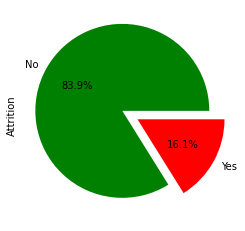

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
ibm = pd.read_csv("https://github.com/SavioSal/datasets/raw/master/HR-Employee-Attrition.csv")

ibm['Attrition'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','r'])
print(ibm['Attrition'].value_counts())

print(round(pd.crosstab(ibm['Attrition'],ibm['Gender'],normalize=True)*100,2))

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Gender Vs Attrition')
sns.countplot('Gender',hue='Attrition',data=ibm)

plt.subplot(122)
plt.title('Gender Vs MonthlyIncome')
sns.boxplot(ibm['Gender'],ibm['MonthlyIncome'],hue='Attrition',data=ibm)

print(pd.crosstab(ibm['Attrition'],ibm['Department']))

plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Department Vs Attrition')
sns.countplot(ibm['Department'],hue=ibm['Attrition'])

plt.subplot(122)
plt.title('Department Vs MonthlyIncome')
sns.boxplot(ibm['Department'],ibm['MonthlyIncome'],hue=ibm['Attrition'])

pd.crosstab([ibm['Attrition']],ibm['JobRole'],normalize=True)*100

plt.figure(figsize=(25,14))

plt.subplot(211)
plt.title('JobRole Vs Attrition')
sns.countplot(ibm['JobRole'],hue=ibm['Attrition'])
plt.title('Attrition amongst different JobRoles',size=15)


plt.subplot(212)
plt.title('JobRole Vs MonthlyIncome')
sns.boxplot(ibm['JobRole'],ibm['MonthlyIncome'])

ibm.groupby(by='JobRole')['MonthlyIncome'].mean().sort_values()

print(pd.crosstab(ibm['JobInvolvement'],ibm['Attrition']))

plt.figure(figsize=(22,16))
plt.subplot(221)
plt.title('JobInvolvement Vs Attrition')
sns.countplot(ibm['JobInvolvement'],hue=ibm['Attrition'])

plt.subplot(222)
plt.title('JobInvolvement Vs Monthly Income')
sns.boxplot(ibm['JobInvolvement'],ibm['MonthlyIncome'],hue=ibm['Attrition'])

plt.figure(figsize=(22,16))
plt.subplot(221)
plt.title('Education Vs Attrition')
sns.countplot(ibm['Education'],hue=ibm['Attrition'])


plt.subplot(222)
plt.title('Education Vs MonthlyIncome')
sns.boxplot(ibm['Education'],ibm['MonthlyIncome'])

print(pd.crosstab(columns=ibm['Attrition'],index=ibm['EducationField']))

plt.figure(figsize=(22,16))
plt.subplot(221)
plt.title('EducationField Vs Attriton')
sns.countplot(ibm['EducationField'],hue=ibm['Attrition'])

plt.subplot(222)
plt.title('EducationField Vs Monthly Income')
sns.boxplot(ibm['EducationField'],ibm['MonthlyIncome'])


plt.figure(figsize=(15,10))
plt.subplot(211)
plt.title('Distribution of Age',size=15)
sns.distplot(ibm['Age'])

plt.subplot(212)
plt.title('Age Wise Binning wrt Attrition',size=15)
sns.countplot(ibm['Age'],hue='Attrition',data=ibm)

#OH6 - January 20, 2023

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://github.com/SavioSal/datasets/raw/master/ProspectsandCustomers.txt")

In [ ]:
df.head()

,ID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.drop(columns = "ID", inplace = True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
# try categorical encoder package: https://contrib.scikit-learn.org/category_encoders/
df_encoded = pd.get_dummies(df)
df_encoded.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2)
pca.fit(df_encoded)

PCA(n_components=2)

In [ ]:
pca.explained_variance_ratio_

array([0.45110884, 0.44084615])

In [ ]:
np_pca = pca.fit_transform(df_encoded)
df_pca = pd.DataFrame(np_pca)

In [ ]:
df_pca.shape

(200, 2)

In [ ]:
df.shape

(200, 4)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters = 2, random_state = 0).fit(df_pca)

In [ ]:
kmeans.labels_

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_pca.iloc[:,0]

0     -31.869381
1       0.765592
2     -57.407825
3      -2.167187
4     -32.173249
         ...    
195    58.351958
196    19.906647
197    58.519749
198    20.977153
199    72.446559
Name: 0, Length: 200, dtype: float64

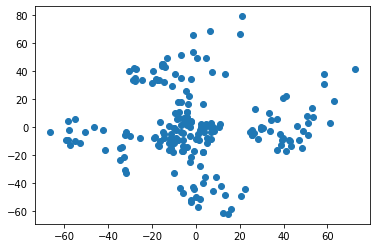

In [ ]:
plt.scatter(df_pca.iloc[:,0], df_pca.iloc[:,1])

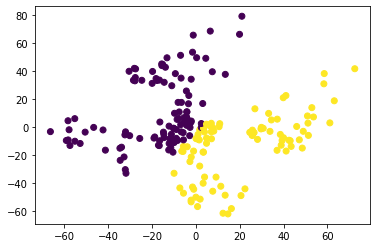

In [ ]:
plt.scatter(df_pca.iloc[:,0], df_pca.iloc[:,1], c = kmeans.labels_)

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


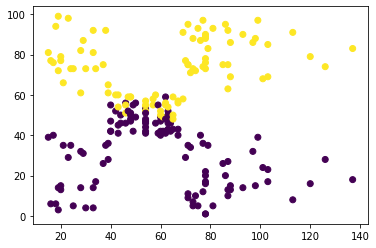

In [ ]:
plt.scatter("Annual Income (k$)", "Spending Score (1-100)", c = kmeans.labels_, data = df)

In [ ]:
sse = {}
for k in range(1, 10):
  kmeans = KMeans(n_clusters = k, max_iter = 100).fit(df_pca)
  sse[k] = kmeans.inertia_

sse

{1: 275535.0134226577,
 2: 181409.79102666012,
 3: 111540.7188123843,
 4: 74669.86075329827,
 5: 45092.031339549016,
 6: 37876.181268691376,
 7: 31188.72338255096,
 8: 26093.11157371745,
 9: 22500.50540214303}

Text(0, 0.5, 'SSE')

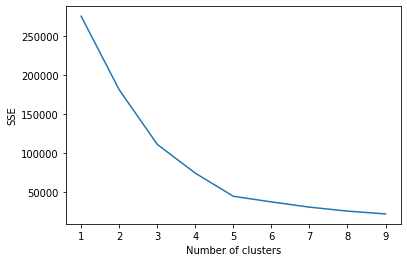

In [ ]:
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")

In [ ]:
# % rate of change
for a,b in zip(list(sse.values()), list(sse.values())[1:]):
  print(100 * (b-a)/a)

-34.1608934656932
-38.51449903495441
-33.055962389039465
-39.611469896095606
-16.002495022948345
-17.656103815482314
-16.33799417286933
-13.768408422371175


# OH7 - January 27, 2023

http://rasbt.github.io/mlxtend/
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html
http://rasbt.github.io/mlxtend/user_guide/feature_selection/ExhaustiveFeatureSelector/

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
import pandas as pd

In [ ]:
df = pd.read_csv("https://github.com/SavioSal/datasets/raw/master/Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
lr = LinearRegression()

In [ ]:
sfs = SequentialFeatureSelector(lr,
                          n_features_to_select=2,
                          scoring = 'neg_root_mean_squared_error')

In [ ]:
X = df.drop(columns = 'sales')
y = df[['sales']]
sfs_model = sfs.fit(X, y)

In [ ]:
sfs_model.get_feature_names_out()

array(['TV', 'radio'], dtype=object)

In [ ]:
import joblib
import sys

sys.modules['sklearn.externals.joblib'] = joblib

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt

In [ ]:
sfs = SFS(lr,
    k_features=3, 
    scoring='neg_root_mean_squared_error')

In [ ]:
sfs_model = sfs.fit(X, y)

In [ ]:
pd.DataFrame.from_dict(sfs_model.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[-3.239879742289169, -3.033137610134192, -3.11...",-3.275669,"(TV,)",0.326425,0.25397,0.126985
2,"(0, 1)","[-1.752610440164414, -1.5525905916006086, -1.2...",-1.702663,"(TV, radio)",0.431255,0.335531,0.167765
3,"(0, 1, 2)","[-1.7710279220728578, -1.5574555397055128, -1....",-1.717525,"(TV, radio, newspaper)",0.45087,0.350793,0.175396


In [ ]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

# OH 8 - February 3, 2023

In [ ]:
import pandas as pd

In [ ]:
boston = pd.read_csv("https://github.com/selva86/datasets/raw/master/BostonHousing.csv")

In [ ]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
X = boston.drop(columns = 'medv')
y = boston.medv

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)

In [ ]:
lr_model.score(X_test, y_test)

0.65924665103541

In [ ]:
lr_model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
y_pred = lr_model.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
# RMSE
metrics.mean_squared_error(y_test, y_pred, squared = False)

5.309659665032168

In [ ]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


https://www.investopedia.com/terms/v/variance-inflation-factor.asp#:~:text=A%20variance%20inflation%20factor%20(VIF)%20is%20a%20measure%20of%20the,adversely%20affect%20the%20regression%20results.

In [ ]:
def vif(vars, data):
  
  vif_dict = {}
  for var in vars:
    not_var = [i for i in vars if i != var]
    X, y = data[not_var], data[var]

    r_squared = LinearRegression().fit(X,y).score(X,y)
    # calc the VIF
    vif = 1 / (1-r_squared)
    vif_dict[var] = vif

  return pd.DataFrame({"VIF":vif_dict})


In [ ]:
vif(X.columns, X).sort_values("VIF", ascending = False)

,VIF
tax,9.008554
rad,7.484496
nox,4.393720
indus,3.991596
dis,3.955945
age,3.100826
lstat,2.941491
zn,2.298758
rm,1.933744
ptratio,1.799084


In [ ]:
X1 = X.drop(columns = 'tax')

In [ ]:
vif(X1.columns, X1).sort_values("VIF", ascending = False)

,VIF
nox,4.369271
dis,3.954446
indus,3.226015
age,3.098044
lstat,2.940800
rad,2.837494
zn,2.184240
rm,1.923075
crim,1.791940
ptratio,1.788839


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 123)

In [ ]:
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)

In [ ]:
lr_model.score(X_test, y_test)

0.6557822018322754

In [ ]:
# RMSE without multicollinearity
metrics.mean_squared_error(y_test, y_pred, squared = False)

5.309659665032168

In [ ]:
X1.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [ ]:
from sklearn.inspection import permutation_importance
X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size = .3, random_state = 123)
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)
lr_model.score(X_test,y_test)
y_pred = lr_model.predict(X_test)
from sklearn import metrics
metrics.mean_squared_error(y_test, y_pred, squared = False)

from sklearn.inspection import permutation_importance

r = permutation_importance(lr_model, X_test, y_test,
                           #n_repeats=10,
                           random_state=123)

pd.DataFrame({"Variables":X1.columns,"Score":r.importances_mean}).sort_values(by="Score",ascending = False)


,Variables,Score
11,lstat,0.280104
7,dis,0.203954
5,rm,0.189430
9,ptratio,0.098803
4,nox,0.091910
10,b,0.029519
8,rad,0.019539
0,crim,0.015628
1,zn,0.013851
3,chas,0.007989


# OH9 - February 10, 2023

In [ ]:
import pandas as pd

In [ ]:
ad = pd.read_csv("https://github.com/SavioSal/datasets/raw/master/Advertising.csv")

In [ ]:
ad.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
X = ad.drop(columns = 'sales')
y = ad.sales

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

ss = StandardScaler()
lr = LinearRegression()

pipe = Pipeline([("scaler", ss),
         ("linearreg", lr)])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


0.9288609285248163

In [ ]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('linearreg', LinearRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'linearreg': LinearRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'linearreg__copy_X': True,
 'linearreg__fit_intercept': True,
 'linearreg__n_jobs': None,
 'linearreg__normalize': 'deprecated',
 'linearreg__positive': False}

measure the time it takes to train and infer from a model: https://docs.python.org/3/library/timeit.html

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
%%time
param_grid = {'linearreg__fit_intercept': [True, False],
              'linearreg__copy_X': [True, False]}

grid = GridSearchCV(pipe, param_grid = param_grid, scoring = 'neg_mean_squared_error')


CPU times: user 62 µs, sys: 5 µs, total: 67 µs
Wall time: 71.8 µs


In [ ]:
%%time
grid.fit(X, y)

CPU times: user 186 ms, sys: 1.49 ms, total: 188 ms
Wall time: 507 ms


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('linearreg', LinearRegression())]),
             param_grid={'linearreg__copy_X': [True, False],
                         'linearreg__fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.02492495, 0.01731853, 0.01340418, 0.0130219 ]),
 'std_fit_time': array([0.009128  , 0.00493773, 0.00380087, 0.00757305]),
 'mean_score_time': array([0.00463853, 0.00615878, 0.00332103, 0.00425992]),
 'std_score_time': array([0.00449661, 0.00479568, 0.00243818, 0.00409573]),
 'param_linearreg__copy_X': masked_array(data=[True, True, False, False],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_linearreg__fit_intercept': masked_array(data=[True, False, True, False],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'linearreg__copy_X': True, 'linearreg__fit_intercept': True},
  {'linearreg__copy_X': True, 'linearreg__fit_intercept': False},
  {'linearreg__copy_X': False, 'linearreg__fit_intercept': True},
  {'linearreg__copy_X': False, 'linearreg__fit_intercept': False}],
 'split0_test_score': array([  -3.1365399 , -193.04126718,   -3.13

In [ ]:
grid.best_params_

{'linearreg__copy_X': True, 'linearreg__fit_intercept': True}

In [ ]:
grid.perdict()

In [ ]:
lr = LinearRegression(copy_X = True, fit_intercept = True)

https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html#sphx-glr-auto-examples-compose-plot-transformed-target-py

In [ ]:
from sklearn.compose import TransformedTargetRegressor

ttr = TransformedTargetRegressor(regressor = LinearRegression(), func = np.log, inverse_func=np.exp)
ss = StandardScaler()

pipe = Pipeline([('scaler', ss), 
                 ('ttregressor', ttr)])

# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)


pipe.get_params()

param_grid = {'ttregressor__regressor__fit_intercept':[True,False], 'ttregressor__regressor__copy_X':[True, False]}
grid = GridSearchCV(pipe,param_grid=param_grid, cv=None)
grid.fit(X_train, y_train)
print("R2: ", grid.best_score_)

grid.get_params()

#OH10 - February 17, 2023

https://otexts.com/fpp3/

https://github.com/datamllab/tods


In [ ]:
import pandas as pd

In [ ]:
co2 = [315.58, 316.39, 316.79, 317.82, 318.39, 318.22, 316.68, 315.01, 314.02, 313.55,
       315.02, 315.75, 316.52, 317.10, 317.79, 319.22, 320.08, 319.70, 318.27, 315.99,
       314.24, 314.05, 315.05, 316.23, 316.92, 317.76, 318.54, 319.49, 320.64, 319.85,
       318.70, 316.96, 315.17, 315.47, 316.19, 317.17, 318.12, 318.72, 319.79, 320.68,
       321.28, 320.89, 319.79, 317.56, 316.46, 315.59, 316.85, 317.87, 318.87, 319.25,
       320.13, 321.49, 322.34, 321.62, 319.85, 317.87, 316.36, 316.24, 317.13, 318.46,
       319.57, 320.23, 320.89, 321.54, 322.20, 321.90, 320.42, 318.60, 316.73, 317.15,
       317.94, 318.91, 319.73, 320.78, 321.23, 322.49, 322.59, 322.35, 321.61, 319.24,
       318.23, 317.76, 319.36, 319.50, 320.35, 321.40, 322.22, 323.45, 323.80, 323.50,
       322.16, 320.09, 318.26, 317.66, 319.47, 320.70, 322.06, 322.23, 322.78, 324.10,
       324.63, 323.79, 322.34, 320.73, 319.00, 318.99, 320.41, 321.68, 322.30, 322.89,
       323.59, 324.65, 325.30, 325.15, 323.88, 321.80, 319.99, 319.86, 320.88, 322.36,
       323.59, 324.23, 325.34, 326.33, 327.03, 326.24, 325.39, 323.16, 321.87, 321.31,
       322.34, 323.74, 324.61, 325.58, 326.55, 327.81, 327.82, 327.53, 326.29, 324.66,
       323.12, 323.09, 324.01, 325.10, 326.12, 326.62, 327.16, 327.94, 329.15, 328.79,
       327.53, 325.65, 323.60, 323.78, 325.13, 326.26, 326.93, 327.84, 327.96, 329.93,
       330.25, 329.24, 328.13, 326.42, 324.97, 325.29, 326.56, 327.73, 328.73, 329.70,
       330.46, 331.70, 332.66, 332.22, 331.02, 329.39, 327.58, 327.27, 328.30, 328.81,
       329.44, 330.89, 331.62, 332.85, 333.29, 332.44, 331.35, 329.58, 327.58, 327.55,
       328.56, 329.73, 330.45, 330.98, 331.63, 332.88, 333.63, 333.53, 331.90, 330.08,
       328.59, 328.31, 329.44, 330.64, 331.62, 332.45, 333.36, 334.46, 334.84, 334.29,
       333.04, 330.88, 329.23, 328.83, 330.18, 331.50, 332.80, 333.22, 334.54, 335.82,
       336.45, 335.97, 334.65, 332.40, 331.28, 330.73, 332.05, 333.54, 334.65, 335.06,
       336.32, 337.39, 337.66, 337.56, 336.24, 334.39, 332.43, 332.22, 333.61, 334.78,
       335.88, 336.43, 337.61, 338.53, 339.06, 338.92, 337.39, 335.72, 333.64, 333.65,
       335.07, 336.53, 337.82, 338.19, 339.89, 340.56, 341.22, 340.92, 339.26, 337.27,
       335.66, 335.54, 336.71, 337.79, 338.79, 340.06, 340.93, 342.02, 342.65, 341.80,
       340.01, 337.94, 336.17, 336.28, 337.76, 339.05, 340.18, 341.04, 342.16, 343.01,
       343.64, 342.91, 341.72, 339.52, 337.75, 337.68, 339.14, 340.37, 341.32, 342.45,
       343.05, 344.91, 345.77, 345.30, 343.98, 342.41, 339.89, 340.03, 341.19, 342.87,
       343.74, 344.55, 345.28, 347.00, 347.37, 346.74, 345.36, 343.19, 340.97, 341.20,
       342.76, 343.96, 344.82, 345.82, 347.24, 348.09, 348.66, 347.90, 346.27, 344.21,
       342.88, 342.58, 343.99, 345.31, 345.98, 346.72, 347.63, 349.24, 349.83, 349.10,
       347.52, 345.43, 344.48, 343.89, 345.29, 346.54, 347.66, 348.07, 349.12, 350.55,
       351.34, 350.80, 349.10, 347.54, 346.20, 346.20, 347.44, 348.67]


In [ ]:
len(co2)

348

In [ ]:
co2_series = pd.Series(co2, index = pd.date_range('1-1-1959', periods = len(co2), freq = 'M'), name = 'CO2')

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

import warnings

In [ ]:
# supply the arima ordeer (p,d,q)
def evaluate_arima_model(X, arima_order):
  # training data
  train_size = int(len(co2)*0.7)
  train, test = X[0:train_size], X[train_size:]
  history = [x for x in train]
  # predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, arima_order)
    model_fit = model.fit()
    y_pred = model_fit.forecast()[0]
    predictions.append(y_pred)
    history.append(test[t])
  # compute the RMSE
  rmse = mean_squared_error(test, predictions, squared = False)
  return rmse

In [ ]:
# try multiple combinations of p,d,q to obtain the best model
def evaluate_models(dataset, p_values, d_values, q_values):
  best_score, best_cfg = float("inf"), None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order = (p,d,q)
        try: 
          rmse = evaluate_arima_model(dataset, order)
          if rmse < best_score:
            best_score, best_cfg = rmse, order
          
          print("ARIMA%s RMSE=%.3f" %(order, rmse))
        except:
          continue
  
  print("Best ARIMA", best_score)
  print("Best config", best_cfg)

In [ ]:
#supply and evalute the parameters
p_values = [0,1,2,3,4]
d_values = range(0,3)
q_values = range(0,3)


In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
evaluate_models(co2_series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=15.721
ARIMA(0, 0, 1) RMSE=7.993
ARIMA(0, 1, 0) RMSE=1.245
ARIMA(0, 1, 1) RMSE=0.908
ARIMA(0, 1, 2) RMSE=0.778
ARIMA(0, 2, 0) RMSE=0.939
ARIMA(0, 2, 1) RMSE=0.895
ARIMA(0, 2, 2) RMSE=0.879
ARIMA(1, 0, 0) RMSE=1.260
ARIMA(1, 0, 1) RMSE=0.919
ARIMA(1, 0, 2) RMSE=0.790
ARIMA(1, 1, 0) RMSE=0.872
ARIMA(1, 1, 1) RMSE=1.233
ARIMA(1, 1, 2) RMSE=0.887
ARIMA(1, 2, 0) RMSE=0.893
ARIMA(2, 0, 0) RMSE=0.894
ARIMA(2, 0, 1) RMSE=0.821
ARIMA(2, 0, 2) RMSE=0.778
ARIMA(2, 1, 0) RMSE=0.736
ARIMA(2, 2, 0) RMSE=0.889
ARIMA(3, 0, 0) RMSE=0.748
ARIMA(3, 1, 0) RMSE=0.704
ARIMA(3, 2, 0) RMSE=0.831
ARIMA(4, 0, 0) RMSE=0.713
ARIMA(4, 1, 0) RMSE=0.705
ARIMA(4, 2, 0) RMSE=0.829
Best ARIMA 0.7038079620392315
Best config (3, 1, 0)


https://dbarchive.biosciencedbc.jp/index-e.html

https://wonder.cdc.gov/Welcome.html

https://www.oasis-brains.org/

https://datasetsearch.research.google.com/



#OH11- February 24, 2023

https://contrib.scikit-learn.org/category_encoders/

In [ ]:
import pandas as pd

In [ ]:
vehicles = pd.read_csv("vehicles.csv")

In [ ]:
vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [ ]:
vehicles.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [ ]:
vehicles.drop(columns = ['id', 'VIN'], inplace = True)
vehicles.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [ ]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  size          120519 non-null  object 
 13  type          334022 non-null  object 
 14  paint_color   296677 non-null  object 
 15  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 52.1+ MB


In [ ]:
vehicles1 = vehicles.convert_dtypes()
vehicles1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        426880 non-null  string
 1   price         426880 non-null  Int64 
 2   year          425675 non-null  Int64 
 3   manufacturer  409234 non-null  string
 4   model         421603 non-null  string
 5   condition     252776 non-null  string
 6   cylinders     249202 non-null  string
 7   fuel          423867 non-null  string
 8   odometer      422480 non-null  Int64 
 9   title_status  418638 non-null  string
 10  transmission  424324 non-null  string
 11  drive         296313 non-null  string
 12  size          120519 non-null  string
 13  type          334022 non-null  string
 14  paint_color   296677 non-null  string
 15  state         426880 non-null  string
dtypes: Int64(3), string(13)
memory usage: 53.3 MB


In [ ]:
vehicles1['size'].unique()

<StringArray>
[<NA>, 'full-size', 'mid-size', 'compact', 'sub-compact']
Length: 5, dtype: string

In [ ]:
vehicles1.isnull().sum()

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [ ]:
vehicles1.describe(include = ['string'])

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
count,426880,409234,421603,252776,249202,423867,418638,424324,296313,120519,334022,296677,426880
unique,404,42,29649,6,8,5,6,3,3,4,13,12,51
top,columbus,ford,f-150,good,6 cylinders,gas,clean,automatic,4wd,full-size,sedan,white,ca
freq,3608,70985,8009,121456,94169,356209,405117,336524,131904,63465,87056,79285,50614


In [ ]:
vehicles2 = vehicles1.dropna()
vehicles2.shape

(79195, 16)

https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer

https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html#sphx-glr-auto-examples-impute-plot-iterative-imputer-variants-comparison-py

In [ ]:
vehicles1.eq(0).sum()

region              0
price           32895
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer         1965
title_status        0
transmission        0
drive               0
size                0
type                0
paint_color         0
state               0
dtype: int64

<AxesSubplot:>

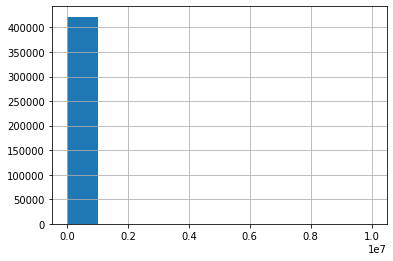

In [ ]:
vehicles1.odometer.hist()

In [ ]:
import statistics

In [ ]:
statistics.mode(vehicles1.odometer)

<NA>

In [ ]:
statistics.mode(vehicles1.price)

0

semantic search, can possibly be used for imputing missing categorical variables
https://www.sbert.net/

#OH12 - March 13, 2023

In [ ]:
from sklearn import datasets, metrics
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
digits = datasets.load_digits()

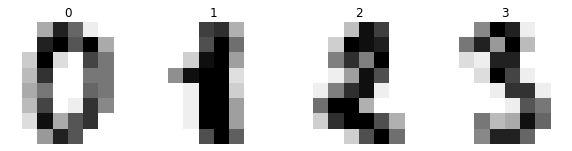

In [ ]:
_, axes = plt.subplots(nrows = 1, ncols = 4, figsize=(10,3))
for ax, image, label in zip(axes, digits.images, digits.target):
  ax.set_axis_off()
  ax.imshow(image, cmap = plt.cm.gray_r)
  ax.set_title(label)

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [ ]:
# train the knn classifier
clf = KNeighborsClassifier()

In [ ]:
# split the dataset in training and testing
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size = 0.3, 
                                                    stratify = digits.target, random_state = 123)

In [ ]:
# fit the model
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# get predictions
y_pred = clf.predict(X_test)

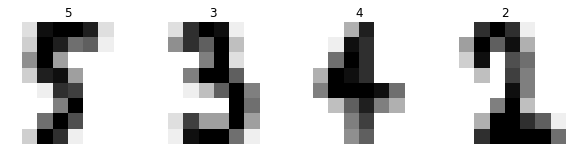

In [ ]:
_, axes = plt.subplots(nrows = 1, ncols = 4, figsize=(10,3))
for ax, image, predictions in zip(axes, X_test, y_pred):
  ax.set_axis_off()
  image = image.reshape(8,8)
  ax.imshow(image, cmap = plt.cm.gray_r)
  ax.set_title(predictions)

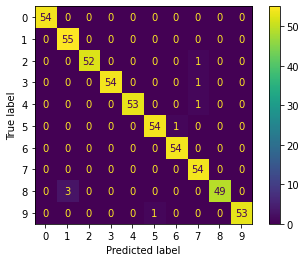

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

generate the classification report 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
k_range = list(range(2,15))
params = dict(n_neighbors = k_range)
knn_grid = GridSearchCV(clf, param_grid = params, scoring = 'accuracy')
knn_grid.fit(data, digits.target)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14]},
             scoring='accuracy')

In [ ]:
knn_grid.cv_results_

{'mean_fit_time': array([0.0017621 , 0.000951  , 0.00086808, 0.00083995, 0.00087237,
        0.00097098, 0.00093241, 0.00086598, 0.00107098, 0.00077934,
        0.00077658, 0.00100036, 0.00081716]),
 'std_fit_time': array([1.21766113e-03, 1.73863839e-04, 1.29452638e-04, 1.29452726e-04,
        1.49319636e-04, 1.55973325e-04, 1.06928370e-04, 1.30842187e-04,
        2.07322414e-04, 5.19698691e-05, 2.67528169e-05, 2.46335867e-04,
        1.15816433e-04]),
 'mean_score_time': array([0.04995894, 0.0345201 , 0.02099466, 0.03830914, 0.05546746,
        0.0803967 , 0.04408317, 0.0395431 , 0.10833454, 0.01536269,
        0.01676784, 0.01712146, 0.01532726]),
 'std_score_time': array([0.04115742, 0.01542206, 0.00342322, 0.02178392, 0.07029789,
        0.06619347, 0.03921362, 0.03827535, 0.07686192, 0.0010872 ,
        0.00232977, 0.00245996, 0.00010313]),
 'param_n_neighbors': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
              mask=[False, False, False, False, False, F

In [ ]:
knn_grid.best_score_

0.9671711544413494

In [ ]:
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=2)

plotting ROC

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

#OH - March 17, 2023

In [ ]:
import pandas as pd

In [ ]:
raw_df = pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv")
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
X, y = raw_df.drop(columns = 'Class'), raw_df.Class

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.3, random_state = 42, stratify = y)


In [ ]:
from sklearn import preprocessing

scaled_df = pd.DataFrame(preprocessing.StandardScaler().fit_transform(raw_df), index = raw_df.index, columns = raw_df.columns)


In [ ]:
X, y = scaled_df.drop(columns = 'Class'), raw_df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.3, random_state = 42, stratify = y)


In [ ]:
# fit the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

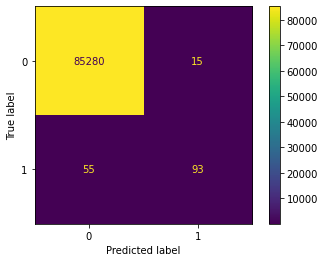

In [ ]:
y_pred = model.predict(X_test)

from sklearn import metrics

#metrics.confusion_matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


In [ ]:
# search thresholds to determine the best F score
from numpy import argmax
from numpy import arange

X, y = scaled_df.drop(columns = 'Class'), raw_df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.3, random_state = 42, stratify = y)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)

In [ ]:
probs = y_pred[:, 1]

In [ ]:
# define the thresholds
thresholds = arange(0, 1, 0.001)

#evaluate the thresholds
scores = [metrics.f1_score(y_test, (probs >= t).astype(int)) for t in thresholds]

In [ ]:
ix = argmax(scores)
thresholds[ix], scores[ix]

(0.40700000000000003, 0.7404580152671754)

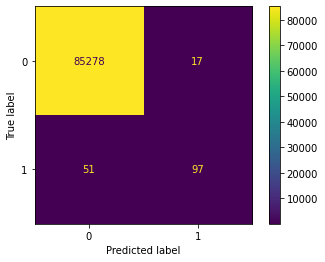

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, (probs >= thresholds[ix]).astype(int))


In [ ]:
# adjust the threshold to maximize ROC AUC
from numpy import argmax
from numpy import arange

X, y = scaled_df.drop(columns = 'Class'), raw_df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.3, random_state = 42, stratify = y)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)
probs = y_pred[:, 1]

Youden's J statistic

https://acsjournals.onlinelibrary.wiley.com/doi/pdf/10.1002/1097-0142%281950%293%3A1%3C32%3A%3AAID-CNCR2820030106%3E3.0.CO%3B2-3

J = sensitivity + specificity - 1

J = TPR + (1- FPR) - 1

J = TPR - FPR

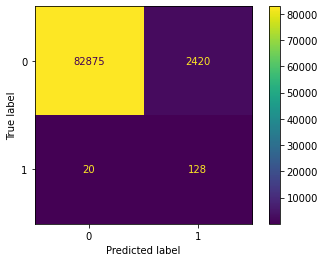

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

J = tpr - fpr

ix = argmax(J)

best_thresh = thresholds[ix]

metrics.ConfusionMatrixDisplay.from_predictions(y_test, (probs >= best_thresh).astype(int))


In [ ]:
thresholds[ix]

0.0022515508846525367

#OH14 - March 24, 2023

###SMOTE:

https://arxiv.org/pdf/1106.1813.pdf

https://imbalanced-learn.org/stable/

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
import pandas as pd

raw_df = pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv")
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
import numpy as np

np.bincount(raw_df['Class'])

array([284315,    492])

In [ ]:
oversample = SMOTE()

In [ ]:
X, y = raw_df.drop(columns = 'Class'), raw_df.Class

In [ ]:
X, y = oversample.fit_resample(X, y)


In [ ]:
from collections import Counter
print(Counter(y))

Counter({0: 284315, 1: 284315})


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
dt_model = DecisionTreeClassifier()
score = cross_val_score(dt_model, X, y, scoring = 'roc_auc')

In [ ]:
print(score)

[0.50635739 0.61522431 0.99460985 0.99770501 0.58292739]


In [ ]:
score.mean()

0.7393647890543938

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5)
score = cross_val_score(dt_model, X, y, scoring = 'roc_auc', cv = cv)

In [ ]:
#SMOTE
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

#create the dataset
X, y = make_classification(n_samples = 10000, n_features = 2,
                    n_redundant = 0, n_clusters_per_class= 1,
                    weights = [0.99], flip_y = 0, random_state = 10)

counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


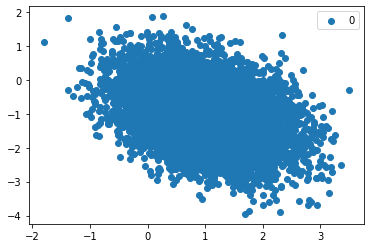

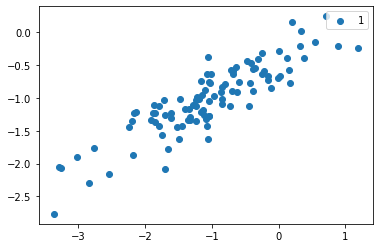

In [ ]:
# scatter plot
from numpy import where
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label = str(label))
  
  plt.legend()
  plt.show()

In [ ]:
#SMOTE
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

#create the dataset
X, y = make_classification(n_samples = 10000, n_features = 2,
                    n_redundant = 0, n_clusters_per_class= 1,
                    weights = [0.99], flip_y = 0, random_state = 10)

counter = Counter(y)
print(counter)

oversample = SMOTE()

Counter({0: 9900, 1: 100})


In [ ]:
X, y = oversample.fit_resample(X, y)

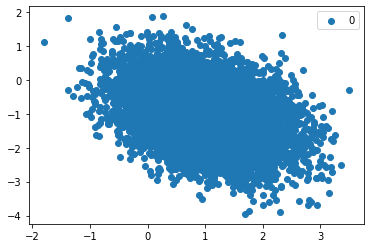

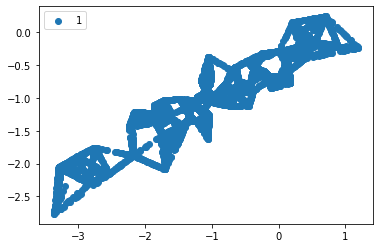

In [ ]:
# scatter plot
from numpy import where
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label = str(label))
  
  plt.legend()
  plt.show()

# OH15 - March 31, 2023

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f(x,y):
  return (x-3.14)**2 + (y-2.75)**2 + np.sin(3*x+1.67) + np.sin(5*y-1.45)

In [ ]:
# compute and visualize
x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))
z = f(x,y)

In [ ]:
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]

In [ ]:
# particle swarm
n_particles = 20
c1 = c2 = 1
w = 0.8

X = np.random.rand(2, n_particles) * 5
V = np.random.randn(2, n_particles) * 0.1

In [ ]:
# initialize
pbest = X
pbest_obj = f(X[0], X[1])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()

In [ ]:
def update():
  global V, X, pbest, gbest, pbest_obj, gbest_obj
  # update the parameters
  r1, r2 = np.random.rand(2)
  V = w * V + c1 * r1 * (pbest - X) + c2 * r2 * (gbest.reshape(-1,1) - X) 
  X = X + V
  obj = f(X[0], X[1])
  pbest[:, pbest_obj >= obj] = X[:, pbest_obj >= obj]
  pbest_obj = np.array([pbest, obj]).min(axis = 0)
  gbest = pbest[:, pbest_obj.argmin()]
  gbest_obj = pbest_obj.min()

In [ ]:
print("best solution at f({}) = {}".format(gbest, gbest_obj))

best solution at f([3.09893343 3.62296781]) = -1.0532225667593398


<ipython-input-7-63ec6499dad8>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pbest_obj = np.array([pbest, obj]).min(axis = 0)


ValueError: ignored

Error in callback <function _draw_all_if_interactive at 0x7f7d24618700> (for post_execute):


ValueError: ignored

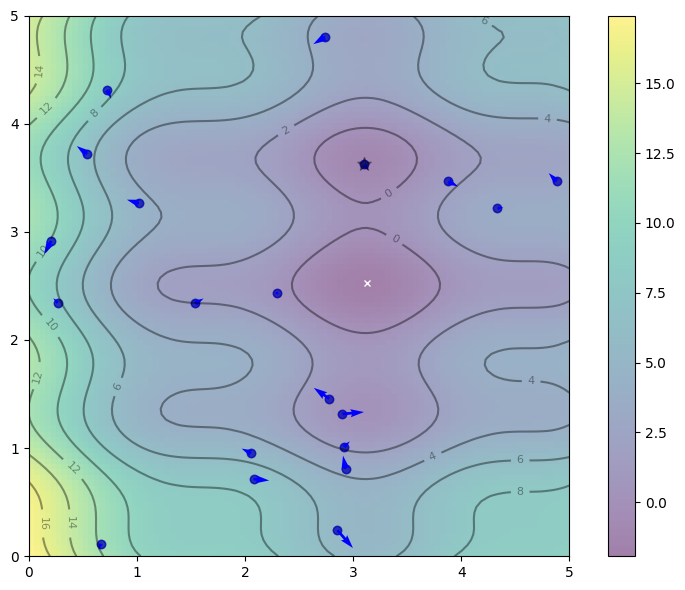

In [ ]:
from matplotlib.animation import FuncAnimation

# Set up base figure: The contour map
fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)
img = ax.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
pbest_plot = ax.scatter(pbest[0], pbest[1], marker='o', color='black', alpha=0.5)
p_plot = ax.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
p_arrow = ax.quiver(X[0], X[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
gbest_plot = plt.scatter([gbest[0]], [gbest[1]], marker='*', s=100, color='black', alpha=0.4)
ax.set_xlim([0,5])
ax.set_ylim([0,5])

def animate(i):
    "Steps of PSO: algorithm update and show in plot"
    title = 'Iteration {:02d}'.format(i)
    # Update params
    update()
    # Set picture
    ax.set_title(title)
    pbest_plot.set_offsets(pbest.T)
    p_plot.set_offsets(X.T)
    p_arrow.set_offsets(X.T)
    p_arrow.set_UVC(V[0], V[1])
    gbest_plot.set_offsets(gbest.reshape(1,-1))
    return ax, pbest_plot, p_plot, p_arrow, gbest_plot
 
anim = FuncAnimation(fig, animate, frames=list(range(1,50)), interval=500, blit=False, repeat=True)
anim.save(filename="PSO.mp4", dpi=120)



#OH 16 - April 7, 2023

In [ ]:
import pandas as pd

In [ ]:
movies = pd.read_csv("https://github.com/SavioSal/datasets/raw/master/movie_clean.csv", 
                     encoding = 'unicode_escape')

In [ ]:
movies.head()

,title,genres,runtime,vote_average,vote_count,year,overview
0,Toy Story,"['animation', 'comedy', 'family']",81.0,7.7,5415.0,1995.0,"Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,"['adventure', 'fantasy', 'family']",104.0,6.9,2413.0,1995.0,When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,"['romance', 'comedy']",101.0,6.5,92.0,1995.0,A family wedding reignites the ancient feud be...
3,Waiting to Exhale,"['comedy', 'drama', 'romance']",127.0,6.1,34.0,1995.0,"Cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,['comedy'],106.0,5.7,173.0,1995.0,Just when George Banks has recovered from his ...


In [ ]:
movies.shape

(45572, 7)

In [ ]:
movies.dropna(inplace = True)

In [ ]:
movies.shape

(44231, 7)

In [ ]:
movies.head()

,title,genres,runtime,vote_average,vote_count,year,overview
0,Toy Story,"['animation', 'comedy', 'family']",81.0,7.7,5415.0,1995.0,"Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,"['adventure', 'fantasy', 'family']",104.0,6.9,2413.0,1995.0,When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,"['romance', 'comedy']",101.0,6.5,92.0,1995.0,A family wedding reignites the ancient feud be...
3,Waiting to Exhale,"['comedy', 'drama', 'romance']",127.0,6.1,34.0,1995.0,"Cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,['comedy'],106.0,5.7,173.0,1995.0,Just when George Banks has recovered from his ...


In [ ]:
movies.tail()

,title,genres,runtime,vote_average,vote_count,year,overview
45461,Subdue,"['drama', 'family']",90.0,4.0,1.0,0.0,Bertram Oliphant West (also known as Bo West) ...
45462,Century of Birthing,['drama'],360.0,9.0,3.0,2011.0,Lt. Bobby Quinn is a Special Forces commando k...
45463,Betrayal,"['action', 'drama', 'thriller']",90.0,3.8,6.0,2003.0,A psychic researcher and his assistants invest...
45464,Satan Triumphant,[],87.0,0.0,0.0,1917.0,Sid and Bernie keep having their amorous inten...
45465,Queerama,[],75.0,0.0,0.0,2017.0,A portrait of the dark and tortured world of a...


In [ ]:
# remove records without genres
movies.query("genres != '[]'", inplace = True)

In [ ]:
movies.shape

(41940, 7)

In [ ]:
movies.query("genres == '[]'")

,title,genres,runtime,vote_average,vote_count,year,overview


In [ ]:
movies.shape

(41940, 7)

In [ ]:
movies.query("'animation' in genres")

,title,genres,runtime,vote_average,vote_count,year,overview


In [ ]:
movies.query('''~genres.str.contains("animation")''', engine = 'python', inplace = True)

In [ ]:
movies.query('''genres.str.contains("animation")''', engine = 'python')

,title,genres,runtime,vote_average,vote_count,year,overview


In [ ]:
# abstract syntax trees
import ast

# read the strings as list
movies.genres = movies.genres.apply(lambda x: " ".join(ast.literal_eval(x)))

In [ ]:
movies.head()

,title,genres,runtime,vote_average,vote_count,year,overview
1,Jumanji,adventure fantasy family,104.0,6.9,2413.0,1995.0,When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,romance comedy,101.0,6.5,92.0,1995.0,A family wedding reignites the ancient feud be...
3,Waiting to Exhale,comedy drama romance,127.0,6.1,34.0,1995.0,"Cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,comedy,106.0,5.7,173.0,1995.0,Just when George Banks has recovered from his ...
5,Heat,action crime drama thriller,170.0,7.7,1886.0,1995.0,"Obsessive master thief, Neil McCauley leads a ..."


In [ ]:
movies.reset_index(inplace =True)

In [ ]:
# TFIDF
# https://tfidf.com/

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline


In [ ]:
model = make_pipeline(TfidfVectorizer(stop_words='english'), 
              SGDClassifier())

In [ ]:
#https://ipython.readthedocs.io/en/stable/interactive/magics.html
%%time
model.fit(movies['overview'], movies['genres'])

CPU times: user 3min 31s, sys: 2min 47s, total: 6min 19s
Wall time: 3min 33s


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(stop_words='english')),
                ('sgdclassifier', SGDClassifier())])

In [ ]:
movies['overview'][0]

"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures."

In [ ]:
model.predict([movies['overview'][0]])

array(['adventure fantasy family'], dtype='<U62')

In [ ]:
model.predict(["Action that has a lot of explosives and cars"])

array(['documentary'], dtype='<U62')

In [ ]:
model.predict(["A stay at home dad who finds himself the next President"])

array(['drama fantasy'], dtype='<U62')

In [ ]:
# pretty woman
model.predict(["Edward, a rich entrepreneur, hires Vivian, a prostitute, to accompany him to a few social events. Trouble ensues when he falls in love with her and they try to bridge the gap between their worlds."])

array(['action crime thriller'], dtype='<U62')

In [ ]:
model.predict(['Robot trying to save the earth and preserve nature'])

array(['action comedy'], dtype='<U62')

In [ ]:
model.predict(["A dragon who became attracted to a fairy which destroyed Mars"])

array(['horror science fiction'], dtype='<U62')

In [ ]:
model.predict(["The opposite lives of a workaholic architect and a fiery artist are upended when their chance encounter in breathtaking Peru shifts their views on life."])

array(['comedy romance'], dtype='<U62')

In [ ]:
model.predict(["Animated movie about a fight between an old-fashioned cowboy who has always been a little boy's favorite toy"])

array(['drama romance'], dtype='<U62')

In [ ]:
model.predict(["A doomsday scenario where only a bunch of humans exists and facing the extinction of universe and trying to be immortal."])

array(['comedy drama'], dtype='<U62')

In [ ]:
model.predict(['''Follows the adventures of Monkey D. Luffy and his pirate crew in order to find the greatest treasure ever left by the legendary Pirate, Gold Roger. The famous mystery treasure named "One Piece". Wealth, Fame, Power.'''])

array(['action adventure'], dtype='<U62')

#OH17 - April 14, 2023

https://christophm.github.io/interpretable-ml-book/index.html

https://github.com/interpretml/DiCE

https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html


In [ ]:
pip install dice-ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.0 MB/s eta 0:00:00


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
default_df = pd.read_csv("https://github.com/SavioSal/datasets/raw/master/Default.csv")
default_df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
default_df.default = le.fit_transform(default_df.default)
default_df.student = le.fit_transform(default_df.student)

In [ ]:
default_df.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [ ]:
X = default_df.drop(columns = 'default')
y = default_df[['default']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123, stratify = y)

In [ ]:
dtclf = DecisionTreeClassifier()
dt_model = dtclf.fit(X_train, y_train)

In [ ]:
import dice_ml

# supply the data
d = dice_ml.Data(dataframe = default_df,
             continuous_features = ['balance', 'income'],
             outcome_name = 'default')

In [ ]:
# supply the model
m = dice_ml.Model(model = dt_model,
              backend = 'sklearn')

In [ ]:
# supply model and data to the explainer
exp = dice_ml.Dice(d,m)

In [ ]:
e1 = exp.generate_counterfactuals(X_test[0:1],
                             total_CFs = 2,
                             desired_class="opposite")

100%|██████████| 1/1 [00:04<00:00,  4.98s/it]


In [ ]:
e1.visualize_as_dataframe()

Query instance (original outcome : 0)


,student,balance,income,default
0,1,1836.780029,15422.232422,0



Diverse Counterfactual set (new outcome: 1.0)


,student,balance,income,default
0,1.0,2640.200000,15423.000163,1
1,1.0,1837.080086,50632.891000,1


In [ ]:
e2 = exp.generate_counterfactuals(X_test[0:1],
                             total_CFs = 10,
                             desired_class="opposite",
                             features_to_vary = ['balance'])

100%|██████████| 1/1 [00:35<00:00, 35.62s/it]


In [ ]:
e2.visualize_as_dataframe()

Query instance (original outcome : 0)


,student,balance,income,default
0,1,1836.780029,15422.232422,0



Diverse Counterfactual set (new outcome: 1.0)


,student,balance,income,default
0,1.0,2183.2,15423.000163,1
1,1.0,1728.5,15423.000163,1
2,1.0,2631.1,15423.000163,1
3,1.0,2234.8,15423.000163,1
4,1.0,2500.7,15423.000163,1
5,1.0,1735.2,15423.000163,1
6,1.0,2224.3,15423.000163,1
7,1.0,2034.2,15423.000163,1
8,1.0,2227.9,15423.000163,1
9,1.0,2451.9,15423.000163,1


In [ ]:
e3 = exp.generate_counterfactuals(X_test[0:1],
                             total_CFs = 10,
                             desired_class="opposite",
                             features_to_vary = ['balance'],
                             permitted_range = {'balance': [2000, 5000]})

e3.visualize_as_dataframe()

100%|██████████| 1/1 [00:28<00:00, 28.50s/it]

Query instance (original outcome : 0)


,student,balance,income,default
0,1,1836.780029,15422.232422,0



Diverse Counterfactual set (new outcome: 1.0)


,student,balance,income,default
0,1.0,2867.6,15423.000163,1
1,1.0,4476.3,15423.000163,1
2,1.0,3772.3,15423.000163,1
3,1.0,4442.0,15423.000163,1
4,1.0,2446.3,15423.000163,1
5,1.0,3596.3,15423.000163,1
6,1.0,3499.2,15423.000163,1
7,1.0,4314.2,15423.000163,1
8,1.0,4108.6,15423.000163,1
9,1.0,3048.9,15423.000163,1


In [ ]:
e4 = exp.generate_counterfactuals(X_test[0:5],
                             total_CFs = 10,
                             desired_class="opposite",
                             features_to_vary = ['balance'],
                             permitted_range = {'balance': [2000, 5000]})

e4.visualize_as_dataframe()

100%|██████████| 5/5 [02:18<00:00, 27.65s/it]

Query instance (original outcome : 0)


,student,balance,income,default
0,1,1836.780029,15422.232422,0



Diverse Counterfactual set (new outcome: 1.0)


,student,balance,income,default
0,1.0,3419.2,15423.000163,1
1,1.0,4194.5,15423.000163,1
2,1.0,2181.2,15423.000163,1
3,1.0,2549.6,15423.000163,1
4,1.0,4942.9,15423.000163,1
5,1.0,3201.9,15423.000163,1
6,1.0,2765.2,15423.000163,1
7,1.0,2358.2,15423.000163,1
8,1.0,2267.9,15423.000163,1
9,1.0,2407.0,15423.000163,1


Query instance (original outcome : 0)


,student,balance,income,default
0,0,1060.728882,49396.773438,0



Diverse Counterfactual set (new outcome: 1.0)


,student,balance,income,default
0,0.0,2017.2,49397.000941,1
1,0.0,2047.2,49397.000941,1
2,0.0,2031.6,49397.000941,1
3,0.0,2018.0,49397.000941,1
4,0.0,2025.5,49397.000941,1
5,0.0,2027.4,49397.000941,1
6,0.0,2026.7,49397.000941,1
7,0.0,2036.8,49397.000941,1
8,0.0,2040.5,49397.000941,1
9,0.0,2027.1,49397.000941,1


Query instance (original outcome : 0)


,student,balance,income,default
0,0,449.312927,47494.433594,0



Diverse Counterfactual set (new outcome: 1.0)


,student,balance,income,default
0,0.0,4480.9,47495.000493,1
1,0.0,3106.1,47495.000493,1
2,0.0,3311.7,47495.000493,1
3,0.0,3386.1,47495.000493,1
4,0.0,4009.0,47495.000493,1
5,0.0,4567.6,47495.000493,1
6,0.0,4425.2,47495.000493,1
7,0.0,4897.4,47495.000493,1
8,0.0,2283.9,47495.000493,1
9,0.0,4798.7,47495.000493,1


Query instance (original outcome : 0)


,student,balance,income,default
0,0,1312.847656,64402.609375,0



Diverse Counterfactual set (new outcome: 1.0)


,student,balance,income,default
0,0.0,3139.8,64403.000907,1
1,0.0,4789.0,64403.000907,1
2,0.0,3009.0,64403.000907,1
3,0.0,4506.0,64403.000907,1
4,0.0,3343.2,64403.000907,1
5,0.0,3708.5,64403.000907,1
6,0.0,3564.7,64403.000907,1
7,0.0,4436.0,64403.000907,1
8,0.0,2770.0,64403.000907,1
9,0.0,3200.7,64403.000907,1


Query instance (original outcome : 0)


,student,balance,income,default
0,1,696.583557,2981.279541,0



Diverse Counterfactual set (new outcome: 1.0)


,student,balance,income,default
0,1.0,2048.6,2982.000548,1
1,1.0,2117.3,2982.000548,1
2,1.0,2059.1,2982.000548,1
3,1.0,2000.0,2982.000548,1
4,1.0,2046.1,2982.000548,1
5,1.0,2109.1,2982.000548,1
6,1.0,2001.8,2982.000548,1
7,1.0,2094.6,2982.000548,1
8,1.0,2050.3,2982.000548,1
9,1.0,2024.0,2982.000548,1


In [ ]:
# OWN QUERY
query = pd.DataFrame([{'student':0,
                      'balance':10000,
                      'income':30000}])

In [ ]:
e5 = exp.generate_counterfactuals(query,
                             total_CFs = 2,
                             desired_class="opposite",
                             features_to_vary = ['income', 'balance'],
                             permitted_range = {'income': [2000, 25000]})

e5.visualize_as_dataframe()

100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

Query instance (original outcome : 1)


,student,balance,income,default
0,0,10000.0,30000.0,1



Diverse Counterfactual set (new outcome: 0.0)


,student,balance,income,default
0,0,946.2,3488.697,0
1,0,601.0,30000.000,0


#OH 18- April 28, 2023

In [ ]:
import spacy
from collections import Counter
from string import punctuation

import spacy.cli
spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_lg")

#for desktop
#python -m spacy download en_core_web_lg


def top_sentence(text, limit):
    #The first part is to tokenize the input text and find out the important keywords in it.

    keyword = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN', 'VERB']
    doc = nlp(text.lower())
    for token in doc:
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        if(token.pos_ in pos_tag):
            keyword.append(token.text)

#    The next step it to normalize the weightage of the keywords.

    freq_word = Counter(keyword)
    max_freq = Counter(keyword).most_common(1)[0][1]
    for w in freq_word:
        freq_word[w] = (freq_word[w]/max_freq)

#Let’s proceed to calculate the importance of the sentences by #identifying the occurrence of important keywords and sum up the #value.        
    sent_strength={}
    for sent in doc.sents:
        for word in sent:
            if word.text in freq_word.keys():
                if sent in sent_strength.keys():
                    sent_strength[sent]+=freq_word[word.text]
                else:
                    sent_strength[sent]=freq_word[word.text]

#You should be able to get a cumulative normalized value for each #sentence. We will use this value to determine the top sentences.    
    summary = []
    
    sorted_x = sorted(sent_strength.items(), key=lambda kv: kv[1], reverse=True)
    
    counter = 0
    for i in range(len(sorted_x)):
        summary.append(str(sorted_x[i][0]).capitalize())

        counter += 1
        if(counter >= limit):
            break
            
    return ' '.join(summary)

example_text = '''Yamaha is reminding people that musical equipment cases are for musical equipment — not people — two weeks after fugitive auto titan Carlos Ghosn reportedly was smuggled out of Japan in one. In a tweet over the weekend, the Japanese musical equipment company said it was not naming any names, but noted there had been many recent stories about people getting into musical equipment cases. Yamaha (YAMCY) warned people not to get into, or let others get into, its cases to avoid "unfortunate accidents." Multiple media outlets have reported that Ghosn managed to sneak through a Japanese airport to a private jet that whisked him out of the country by hiding in a large, black music equipment case with breathing holes drilled in the bottom. CNN Business has not independently confirmed those details of his escape. The former Nissan (NSANF) CEO had been out on bail awaiting trial in Japan on charges of financial wrongdoing before making his stunning escape to Lebanon at the end of December. Ghosn has referred to his departure as an effort to "escape injustice." In an interview with CNN\'s Richard Quest last week, Ghosn did not comment on the nature of his escape, saying he didn\'t want to endanger any of the people who aided in the operation. Ghosn did, however, respond to a question about what it felt like to ride through the airport in a packing case by first declining to comment but then adding: "Freedom, no matter the way it happens, is always sweet." In a press conference in Lebanon ahead of the CNN interview last Wednesday, Ghosn\'s first public appearance since fleeing Japan, Ghosn said he decided to leave the country because he believed he would not receive a fair trial, a claim Japanese authorities have disputed. Brands sometimes capitalize on their tangential relationship to big news in order to attract attention on social media. Yamaha is one of Japan\'s best known brands and Ghosn was one of Japan\'s top executives before being ousted from Nissan — a match made in social media heaven. Not surprisingly, Yamaha\'s post went viral on Twitter over the weekend.'''

print(top_sentence(example_text, 3))


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
Yamaha is reminding people that musical equipment cases are for musical equipment — not people — two weeks after fugitive auto titan carlos ghosn reportedly was smuggled out of japan in one. In a press conference in lebanon ahead of the cnn interview last wednesday, ghosn's first public appearance since fleeing japan, ghosn said he decided to leave the country because he believed he would not receive a fair trial, a claim japanese authorities have disputed. In a tweet over the weekend, the japanese musical equipment company said it was not naming any names, but noted there had been many recent stories about people getting into musical equipment cases.


In [ ]:
# Exercise #2
import spacy
from spacy import displacy

raw_text="The Indian Space Research Organisation or is the national space agency of India, headquartered in Bengaluru. It operates under Department of Space which is directly overseen by the Prime Minister of India while Chairman of ISRO acts as executive of DOS as well."
text1= nlp(raw_text)
for word in text1.ents:
    print(word.text,word.label_)

spacy.explain("ORG")

spacy.explain("GPE")


displacy.render(text1,style="ent",jupyter=True)



The Indian Space Research Organisation ORG
India GPE
Bengaluru GPE
Department of Space ORG
India GPE
ISRO ORG


In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
                            #multi-qa-mpnet-base-dot-v1')
                            #multi-qa-distilbert-cos-v1')
                            #all-MiniLM-L6-v2')
                            #all-mpnet-base-v2')


statements = ["I love pizza",
              "I hate vegetables",
              "Pizza is my favorite food",
              "Vegetables are disgusting"]

#Compute embeddings for the json file statements
corpus_embed = model.encode(statements, show_progress_bar=True, normalize_embeddings=True)
test_embed = model.encode("I like bread based eats.", show_progress_bar=True, normalize_embeddings=True)

hits = util.semantic_search(test_embed, corpus_embed, score_function=util.dot_score)
hits


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'corpus_id': 2, 'score': 0.5172463655471802},
  {'corpus_id': 0, 'score': 0.4977302551269531},
  {'corpus_id': 1, 'score': 0.3949207067489624},
  {'corpus_id': 3, 'score': 0.35212284326553345}]]

# OH 19 - May 2023

In [ ]:
pip install scikit-surprise


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095441 sha256=9d4a583b2bb39f2e21ce0ed49de4ce47e8ae401ba51b8be06d8184d3b88efd6f
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


https://engineering.linkedin.com/blog/2020/course-recommendations-ai-part-one

https://github.com/twitter/the-algorithm

In [ ]:
from surprise import SVD, Dataset
from surprise.accuracy import rmse


# Load the movielens-100k dataset (download it if needed).
data = Dataset.load_builtin('ml-100k')
trainset = data.build_full_trainset()

# Use an example algorithm: SVD.
algo = SVD()
algo.fit(trainset)

# predict ratings for all pairs (u, i) that are in the training set.
testset = trainset.build_testset()
predictions = algo.test(testset)
rmse(predictions)                                                                              

#actual predictions as thse items have not been seen by the users. there is no ground truth. 
# We predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)
rmse(predictions)                                                                              



Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k
RMSE: 0.6727
RMSE: 0.6041


0.6040577562923525

https://github.com/NicolasHug/Surprise/blob/master/examples/top_n_recommendations.py


In [ ]:
# https://github.com/NicolasHug/Surprise
from surprise import SVD, Dataset
from surprise.dump import load
from collections import defaultdict
import pandas as pd

def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.
    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.
    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


top_n = get_top_n(predictions, n=10)

for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

## recommendations above are illegible.
## lets make it legible by importing the dataset on item / movie name


196 ['408', '483', '64', '187', '114', '190', '604', '127', '318', '654']
186 ['515', '316', '408', '318', '114', '483', '357', '490', '513', '498']
22 ['12', '64', '318', '302', '192', '408', '603', '23', '191', '169']
244 ['187', '654', '127', '14', '98', '285', '316', '480', '603', '478']
166 ['408', '657', '174', '185', '169', '1007', '12', '474', '114', '607']
298 ['313', '64', '513', '408', '169', '83', '657', '114', '136', '272']
115 ['474', '179', '168', '169', '483', '408', '14', '709', '286', '923']
253 ['515', '408', '114', '357', '178', '174', '313', '603', '169', '651']
305 ['513', '213', '515', '499', '603', '205', '498', '657', '516', '132']
6 ['603', '114', '654', '1449', '428', '48', '919', '171', '1021', '647']
62 ['169', '408', '248', '478', '154', '654', '137', '262', '750', '124']
286 ['515', '480', '12', '657', '529', '114', '64', '1137', '736', '318']
200 ['64', '114', '272', '270', '1194', '302', '408', '603', '615', '178']
210 ['318', '408', '169', '427', '178'

In [ ]:
# https://files.grouplens.org/datasets/movielens/ml-100k/
df = pd.read_csv("https://files.grouplens.org/datasets/movielens/ml-100k/u.item",
                 header=None,
                 sep='|', encoding='latin-1')

df.head()

col = "movie id | movie title | release date | video release date | \
              IMDb URL | unknown | Action | Adventure | Animation | \
              Children's | Comedy | Crime | Documentary | Drama | Fantasy | \
              Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | \
              Thriller | War | Western"

df.columns = col.split(" | ")

df.head()

col.split(" | ")

genre_names =  ['unknown',
 'Action',
 'Adventure',
 'Animation',
 "              Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 '              Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 '              Thriller',
 'War',
 'Western']

df.info()

for i in genre_names:
  df[i].replace(0, "", inplace = True)
  df[i].replace(1, i, inplace = True)

df.head()

df['genre'] = df[genre_names].agg(' '.join, axis=1)
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   movie id                  1682 non-null   int64  
 1   movie title               1682 non-null   object 
 2   release date              1681 non-null   object 
 3   video release date        0 non-null      float64
 4                 IMDb URL    1679 non-null   object 
 5   unknown                   1682 non-null   int64  
 6   Action                    1682 non-null   int64  
 7   Adventure                 1682 non-null   int64  
 8   Animation                 1682 non-null   int64  
 9                 Children's  1682 non-null   int64  
 10  Comedy                    1682 non-null   int64  
 11  Crime                     1682 non-null   int64  
 12  Documentary               1682 non-null   int64  
 13  Drama                     1682 non-null   int64  
 14  Fantasy 

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,,,,Animation,Children's,...,,,,,,,,,,Animation Children's Comedy ...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,,Action,Adventure,,,...,,,,,,,Thriller,,,Action Adventure T...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,,,,,,...,,,,,,,Thriller,,,Thriller
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,,Action,,,,...,,,,,,,,,,Action Comedy Drama
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),,,,,,...,,,,,,,Thriller,,,Crime Drama Thrill...


In [ ]:
df = df[['movie id', 'movie title', 'genre']]
df.set_index('movie id',inplace=True)
#predictions, algo = load('./surprise_model')
df.head()

top_n = get_top_n(predictions, n=5)
# Print the recommended items for each user; limit to 4 users
limit = 0
for uid, user_ratings in top_n.items():
    print('\nUser:',uid)
    seen = [df.loc[int(iid),'movie title'] for (iid, _) in algo.trainset.ur[int(uid)]]
    #if len(seen) > 10: seen = seen[:10]
    print('\tSeen:',seen)
    print('\tRecommendations:',[df.loc[int(iid),'movie title'] for (iid, _) in user_ratings])
    limit+=1
    if limit>3:
        break



User: 196
	Seen: ['Mary Reilly (1996)', "Jackie Chan's First Strike (1996)", 'Willy Wonka and the Chocolate Factory (1971)', 'Jean de Florette (1986)', 'Dances with Wolves (1990)', 'Homeward Bound: The Incredible Journey (1993)', 'Son in Law (1993)', 'Bed of Roses (1996)', 'Mortal Kombat: Annihilation (1997)', 'Pagemaster, The (1994)', 'Canadian Bacon (1994)', 'Legends of the Fall (1994)', 'Species (1995)', 'Hunt for Red October, The (1990)', 'Rock, The (1996)', 'Coneheads (1993)', 'Big Sleep, The (1946)', 'Spellbound (1945)', 'Rosencrantz and Guildenstern Are Dead (1990)', 'Taxi Driver (1976)', 'Village of the Damned (1995)', 'Madness of King George, The (1994)', 'Die Hard (1988)', 'Up Close and Personal (1996)', 'Mrs. Brown (Her Majesty, Mrs. Brown) (1997)', 'Brazil (1985)', 'Kicking and Screaming (1995)', 'Batman (1989)', 'Firm, The (1993)', 'Craft, The (1996)', 'Platoon (1986)', 'L.A. Confidential (1997)', 'To Kill a Mockingbird (1962)', "Muriel's Wedding (1994)", 'Body Snatcher, 

In [ ]:
# Exercise 2 - content based filtering
import pandas as pd

movies = pd.read_csv("https://github.com/SavioSal/datasets/raw/master/movie_clean.csv", 
                     encoding = 'unicode_escape')

In [ ]:
movies.head()

,title,genres,runtime,vote_average,vote_count,year,overview
0,Toy Story,"['animation', 'comedy', 'family']",81.0,7.7,5415.0,1995.0,"Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,"['adventure', 'fantasy', 'family']",104.0,6.9,2413.0,1995.0,When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,"['romance', 'comedy']",101.0,6.5,92.0,1995.0,A family wedding reignites the ancient feud be...
3,Waiting to Exhale,"['comedy', 'drama', 'romance']",127.0,6.1,34.0,1995.0,"Cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,['comedy'],106.0,5.7,173.0,1995.0,Just when George Banks has recovered from his ...


In [ ]:
movies.shape

(45572, 7)

In [ ]:
movies_new = movies[movies['vote_average'] > 7] 
movies_new.shape

(7714, 7)

In [ ]:
movies_new = movies_new.reset_index()

In [ ]:
len(movies_new[movies_new['overview'].isna()])

156

In [ ]:
movies_new['overview'] = movies_new['overview'].fillna('')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# https://tfidf.com/

In [ ]:
tfidf = TfidfVectorizer(stop_words = 'english')

In [ ]:
tfidf_matrix = tfidf.fit_transform(movies_new['overview'])
print(tfidf_matrix)

  (0, 7817)	0.14272795631004825
  (0, 1967)	0.16153122597090963
  (0, 16185)	0.10595912814741203
  (0, 9678)	0.11097031197711084
  (0, 8669)	0.1373439598965242
  (0, 20281)	0.10929419108108458
  (0, 25058)	0.1373439598965242
  (0, 5327)	0.1306659428259581
  (0, 21348)	0.14172672975415035
  (0, 12734)	0.1075589826875022
  (0, 21260)	0.09652903133794946
  (0, 16780)	0.12750260536071006
  (0, 878)	0.150047309129906
  (0, 24664)	0.11885885279058876
  (0, 16449)	0.18997947475779023
  (0, 4209)	0.48459367791272895
  (0, 3888)	0.11255836940637114
  (0, 3231)	0.12701973428860708
  (0, 24016)	0.11506404784924885
  (0, 12512)	0.14489006721939837
  (0, 16587)	0.0931508115561448
  (0, 28621)	0.14730710157746935
  (0, 1434)	0.4251801892624511
  (0, 30910)	0.459631939785462
  (0, 16208)	0.1140247840744468
  :	:
  (7713, 4340)	0.1503089312027454
  (7713, 12508)	0.09888574941523143
  (7713, 10629)	0.11726809869346727
  (7713, 19081)	0.11178752622335994
  (7713, 22773)	0.11896747869450994
  (7713, 3138

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
cosine_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_similarity

array([[1.        , 0.        , 0.        , ..., 0.        , 0.00434795,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.01600189],
       [0.        , 0.        , 1.        , ..., 0.        , 0.00382082,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.00577313],
       [0.00434795, 0.        , 0.00382082, ..., 0.        , 1.        ,
        0.00922048],
       [0.        , 0.01600189, 0.        , ..., 0.00577313, 0.00922048,
        1.        ]])

In [ ]:
cosine_similarity.shape

(7714, 7714)

In [ ]:
indices = pd.Series(movies_new.index, index = movies_new['title']).drop_duplicates()

In [ ]:
indices

title
Toy Story                          0
Heat                               1
Balto                              2
Nixon                              3
Casino                             4
                                ... 
Dyketactics                     7709
Pickpocket                      7710
In a Heartbeat                  7711
The Man with the Rubber Head    7712
Century of Birthing             7713
Length: 7714, dtype: int64

In [ ]:
similarity_scores = list(enumerate(cosine_similarity[0]))
similarity_scores = sorted(similarity_scores, key = lambda x: x[1], reverse = True)
similarity_scores[1:11]

[(3029, 0.5177099048466633),
 (7267, 0.21184972709165517),
 (235, 0.1666072877377134),
 (3371, 0.1387599360974652),
 (2384, 0.13608534364292962),
 (5081, 0.11057769270196231),
 (753, 0.10571923427313007),
 (3993, 0.09946695661989191),
 (474, 0.08926025787791772),
 (3230, 0.0846059221813137)]

In [ ]:
def movie_recommender(title):
  idx = indices[title]
  similarity_scores = list(enumerate(cosine_similarity[idx]))
  similarity_scores = sorted(similarity_scores, key = lambda x: x[1], reverse = True)
  scores_final = similarity_scores[1:11]
  movies_indices = [i[0] for i in scores_final]
  return movies_new['title'].iloc[movies_indices]

In [ ]:
movies_new.head()

,index,title,genres,runtime,vote_average,vote_count,year,overview
0,0,Toy Story,"['animation', 'comedy', 'family']",81.0,7.7,5415.0,1995.0,"Led by Woody, Andy's toys live happily in his ..."
1,5,Heat,"['action', 'crime', 'drama', 'thriller']",170.0,7.7,1886.0,1995.0,"Obsessive master thief, Neil McCauley leads a ..."
2,12,Balto,"['family', 'animation', 'adventure']",78.0,7.1,423.0,1995.0,An outcast half-wolf risks his life to prevent...
3,13,Nixon,"['history', 'drama']",192.0,7.1,72.0,1995.0,An all-star cast powers this epic look at Amer...
4,15,Casino,"['drama', 'crime']",178.0,7.8,1343.0,1995.0,The life of the gambling paradise â Las Vega...


In [ ]:
movie_recommender("Casino")

4113                                                  Ida
7436                           Myst?¿re ?á la Tour Eiffel
34                                                  Smoke
4383                                         Winter Sleep
4674                                      The War at Home
2891                             The Man Without a Shadow
1109                                                    Z
2557                                                Julia
6                                       Leaving Las Vegas
3213    Who Is Harry Nilsson (And Why Is Everybody Tal...
Name: title, dtype: object

In [ ]:
movies_new.head(40)

,index,title,genres,runtime,vote_average,vote_count,year,overview
0,0,Toy Story,"['animation', 'comedy', 'family']",81.0,7.7,5415.0,1995.0,"Led by Woody, Andy's toys live happily in his ..."
1,5,Heat,"['action', 'crime', 'drama', 'thriller']",170.0,7.7,1886.0,1995.0,"Obsessive master thief, Neil McCauley leads a ..."
2,12,Balto,"['family', 'animation', 'adventure']",78.0,7.1,423.0,1995.0,An outcast half-wolf risks his life to prevent...
3,13,Nixon,"['history', 'drama']",192.0,7.1,72.0,1995.0,An all-star cast powers this epic look at Amer...
4,15,Casino,"['drama', 'crime']",178.0,7.8,1343.0,1995.0,The life of the gambling paradise â Las Vega...
5,16,Sense and Sensibility,"['drama', 'romance']",136.0,7.2,364.0,1995.0,"Rich Mr. Dashwood dies, leaving his second wif..."
6,24,Leaving Las Vegas,"['drama', 'romance']",112.0,7.1,365.0,1995.0,"Ben Sanderson, an alcoholic Hollywood screenwr..."
7,27,Persuasion,"['drama', 'romance']",104.0,7.4,36.0,1995.0,This film adaptation of Jane Austen's last nov...
8,28,The City of Lost Children,"['fantasy', 'science fiction', 'adventure']",108.0,7.6,308.0,1995.0,A scientist in a surrealist society kidnaps ch...
9,31,Twelve Monkeys,"['science fiction', 'thriller', 'mystery']",129.0,7.4,2470.0,1995.0,"In the year 2035, convict James Cole reluctant..."


In [ ]:
# Exercise 3
# https://en.wikipedia.org/wiki/Apriori_algorithm

In [ ]:
# collaborative filtering using association rules
transactions = [['apple', 'banana', 'orange'],
                ['banana', 'watermelon', 'grape'],
                ['grape', 'apple', 'banana'],
                ['banana', 'watermelon', 'orange'],
                ['apple', 'grape']]


In [ ]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df


,apple,banana,grape,orange,watermelon
0,True,True,False,True,False
1,False,True,True,False,True
2,True,True,True,False,False
3,False,True,False,True,True
4,True,False,True,False,False


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(apple)
1,0.8,(banana)
2,0.6,(grape)
3,0.4,(orange)
4,0.4,(watermelon)
5,0.4,"(banana, apple)"
6,0.4,"(apple, grape)"
7,0.4,"(banana, grape)"
8,0.4,"(banana, orange)"
9,0.4,"(banana, watermelon)"


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(apple),(grape),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
1,(grape),(apple),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
2,(banana),(orange),0.8,0.4,0.4,0.500000,1.250000,0.08,1.2
3,(orange),(banana),0.4,0.8,0.4,1.000000,1.250000,0.08,inf
4,(banana),(watermelon),0.8,0.4,0.4,0.500000,1.250000,0.08,1.2
5,(watermelon),(banana),0.4,0.8,0.4,1.000000,1.250000,0.08,inf


In [ ]:
user_history = ['apple', 'banana']
recommended_items = set()

for itemset in rules.antecedents:
    if set(itemset).issubset(user_history):
        for item in rules.loc[rules.antecedents == itemset, 'consequents']:
            recommended_items.update(item)


recommended_items


{'grape', 'orange', 'watermelon'}

# OH 21- May 19, 2023

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot


In [ ]:
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y


In [ ]:
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model


In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['stacking'] = get_stacking()
	return models


In [ ]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores


In [ ]:
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.828 (0.044)
>stacking 0.935 (0.022)


Model Stacking: What is the input to the meta learner?
The input to the meta-model are the predictions made by the base-models, not the raw inputs from the dataset. The target is the same expected target value. The predictions made by the base-models used to train the meta-model are for examples not used to train the base-models, meaning that they are out of sample.


#OH22 - May 26, 2023


https://playground.tensorflow.org/
* Backpropagation: https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/
* https://www.iro.umontreal.ca/~vincentp/ift3395/lectures/backprop_old.pdf
* https://huggingface.co/models
* https://gpt4all.io/index.html
* https://huggingface.co/spaces/Vision-CAIR/minigpt4



#OH23 - June 2, 2023

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
def get_mlp_model(hiddenLayerOne=512, hiddenLayerTwo=256,
	dropout=0.2, learnRate=0.01):

  # initialize a sequential model and add layer to flatten the input data
  model = Sequential()
  model.add(Flatten())

  model.add(Dense(hiddenLayerOne, activation="relu", input_shape=(784,)))
  model.add(Dropout(dropout))
  model.add(Dense(hiddenLayerTwo, activation="relu"))
  model.add(Dropout(dropout))
  # add a softmax layer
  model.add(Dense(10, activation = "softmax"))
  #compile the model
  model.compile(optimizer = Adam(learning_rate=learnRate),
                loss = "sparse_categorical_crossentropy",
                metrics = ['accuracy'])
  return model


In [ ]:
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow.keras.datasets import mnist

# load the MNIST dataset
print("[INFO] downloading MNIST...")
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()


[INFO] downloading MNIST...
11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#scale the data to ranges 0-1
trainData = trainData.astype("float32") / 255.0
testData = testData.astype("float32") / 255.0


In [ ]:
# initialize the model
print("Initializing the model")
model = get_mlp_model()

Initializing the model


In [ ]:
# train the network
print("Training the model")
model.fit(x = trainData, y = trainLabels,
          validation_data = (testData, testLabels),
          batch_size = 20,
          epochs = 2)


Training the model
Epoch 1/2
3000/3000 [==============================] - 34s 11ms/step - loss: 0.4621 - accuracy: 0.8877 - val_loss: 0.2979 - val_accuracy: 0.9293
Epoch 2/2
3000/3000 [==============================] - 35s 12ms/step - loss: 0.4484 - accuracy: 0.8896 - val_loss: 0.3300 - val_accuracy: 0.9273


In [ ]:
accuracy = model.evaluate(testData, testLabels)[1]
print(f"Accuracy is: {accuracy}*100")

313/313 [==============================] - 2s 6ms/step - loss: 0.3300 - accuracy: 0.9273
Accuracy is: 0.927299976348877*100


In [ ]:
pip install scikeras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
model = KerasClassifier(build_fn = get_mlp_model, verbose = 0)

<ipython-input-17-72a3d67eae06>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = get_mlp_model, verbose = 0)


In [ ]:
# define the hyperparams grid
hiddenLayerOne=[256, 512]
hiddenLayerTwo=[128, 256, 512]
dropout= [0.2, 0.3, 0.4]
learnRate=[0.01, 0.001, 0.0001]

In [ ]:
grid = dict(
    hiddenLayerOne=hiddenLayerOne,
    hiddenLayerTwo=hiddenLayerTwo,
    dropout=dropout,
    learnRate=learnRate
)

In [ ]:
# perform random search 
searcher = RandomizedSearchCV(estimator = model,
                              n_jobs = -1, cv = 3, 
                              param_distributions = grid, 
                              scoring = 'accuracy')
results = searcher.fit(trainData, trainLabels)

In [ ]:
best_score = results.best_score_
best_params = results.best_params_
best_model = results.best_estimator_

In [ ]:
best_params

{'learnRate': 0.001,
 'hiddenLayerTwo': 512,
 'hiddenLayerOne': 512,
 'dropout': 0.2}

In [ ]:
best_score

0.9592333333333333

https://arxiv.org/pdf/1808.03314.pdf

https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/